In [707]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

import matplotlib.pyplot as plt

In [708]:
# Setting up activation, hidden, and output layers.
model = Sequential([
    Dense(units = 12, input_shape = (6,), activation = 'relu'),
    Dense(units = 36, activation = 'relu'),
    Dense(units = 6, activation = 'relu'),
    Dense(units = 2, activation = 'softmax')
])

# Compile model
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Layer summary
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_110 (Dense)            (None, 12)                84        
_________________________________________________________________
dense_111 (Dense)            (None, 36)                468       
_________________________________________________________________
dense_112 (Dense)            (None, 6)                 222       
_________________________________________________________________
dense_113 (Dense)            (None, 2)                 14        
Total params: 788
Trainable params: 788
Non-trainable params: 0
_________________________________________________________________


In [709]:
# Cochise county model
coconino = pd.read_csv("C:/Users/edoar/Documents/School_Documents/Fall_2021/Capstone/random_forest_files/coconino.csv")

In [710]:
coconino['flagstaff_hmi'] = pd.cut(coconino.flagstaff_hmi, bins = [0, 199999, 600000], labels = ['0', '1'])
coconino['flagstaff_hmi'] = coconino['flagstaff_hmi'].astype(int)
coconino

,date,flagstaff_hmi,total_arrests,crime_rate,population_estimates,poverty_percentage,state_tax
0,2000,0,10434,6660.4,116717,15.0,7303000
1,2001,0,11375,6848.8,117803,15.0,8545000
2,2002,0,11638,7717.6,120390,15.0,11246000
3,2003,1,12876,7502.3,121545,15.0,11981000
4,2004,1,14102,6702.4,123349,16.0,8545000
5,2005,1,12666,6972.5,124804,18.0,8545000
6,2006,1,13067,6586.8,126029,16.8,11981000
7,2007,1,11691,6099.8,127451,16.2,14844000
8,2008,1,12442,5838.6,128426,16.0,12448000
9,2009,1,10494,5183.9,129849,18.0,14844000


In [711]:
# Get X and y
X = coconino.drop('flagstaff_hmi', axis = 1)
Y = coconino['flagstaff_hmi']

# Splitting training and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

# scale data
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [712]:
# Keras model
history = model.fit(x = X_train, y = y_train.values, batch_size = 4, epochs = 100, shuffle = True, verbose = 2, validation_data = (X_test, y_test.values))

Epoch 1/100
5/5 - 0s - loss: 0.6645 - accuracy: 0.7059 - val_loss: 0.6584 - val_accuracy: 0.8000
Epoch 2/100
5/5 - 0s - loss: 0.6278 - accuracy: 0.8824 - val_loss: 0.6298 - val_accuracy: 0.8000
Epoch 3/100
5/5 - 0s - loss: 0.5924 - accuracy: 0.8824 - val_loss: 0.6020 - val_accuracy: 0.8000
Epoch 4/100
5/5 - 0s - loss: 0.5543 - accuracy: 0.8824 - val_loss: 0.5773 - val_accuracy: 0.8000
Epoch 5/100
5/5 - 0s - loss: 0.5206 - accuracy: 0.8824 - val_loss: 0.5517 - val_accuracy: 0.8000
Epoch 6/100
5/5 - 0s - loss: 0.4864 - accuracy: 0.8824 - val_loss: 0.5269 - val_accuracy: 0.8000
Epoch 7/100
5/5 - 0s - loss: 0.4514 - accuracy: 0.8824 - val_loss: 0.5038 - val_accuracy: 0.8000
Epoch 8/100
5/5 - 0s - loss: 0.4168 - accuracy: 0.8824 - val_loss: 0.4836 - val_accuracy: 0.8000
Epoch 9/100
5/5 - 0s - loss: 0.3866 - accuracy: 0.8824 - val_loss: 0.4644 - val_accuracy: 0.8000
Epoch 10/100
5/5 - 0s - loss: 0.3547 - accuracy: 0.8824 - val_loss: 0.4472 - val_accuracy: 0.8000
Epoch 11/100
5/5 - 0s - loss:

Epoch 85/100
5/5 - 0s - loss: 0.0816 - accuracy: 1.0000 - val_loss: 0.3051 - val_accuracy: 0.8000
Epoch 86/100
5/5 - 0s - loss: 0.0813 - accuracy: 1.0000 - val_loss: 0.3055 - val_accuracy: 0.8000
Epoch 87/100
5/5 - 0s - loss: 0.0811 - accuracy: 1.0000 - val_loss: 0.3076 - val_accuracy: 0.8000
Epoch 88/100
5/5 - 0s - loss: 0.0807 - accuracy: 1.0000 - val_loss: 0.3117 - val_accuracy: 0.8000
Epoch 89/100
5/5 - 0s - loss: 0.0804 - accuracy: 1.0000 - val_loss: 0.3123 - val_accuracy: 0.8000
Epoch 90/100
5/5 - 0s - loss: 0.0801 - accuracy: 1.0000 - val_loss: 0.3142 - val_accuracy: 0.8000
Epoch 91/100
5/5 - 0s - loss: 0.0798 - accuracy: 1.0000 - val_loss: 0.3110 - val_accuracy: 0.8000
Epoch 92/100
5/5 - 0s - loss: 0.0795 - accuracy: 1.0000 - val_loss: 0.3110 - val_accuracy: 0.8000
Epoch 93/100
5/5 - 0s - loss: 0.0793 - accuracy: 1.0000 - val_loss: 0.3128 - val_accuracy: 0.8000
Epoch 94/100
5/5 - 0s - loss: 0.0790 - accuracy: 1.0000 - val_loss: 0.3166 - val_accuracy: 0.8000
Epoch 95/100
5/5 - 0

In [713]:
# evaluate model accuracy
_, accuracy = model.evaluate(X, Y, verbose = 0)
print('Accuracy: %.2f' % (accuracy * 100))

Accuracy: 86.36


In [714]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

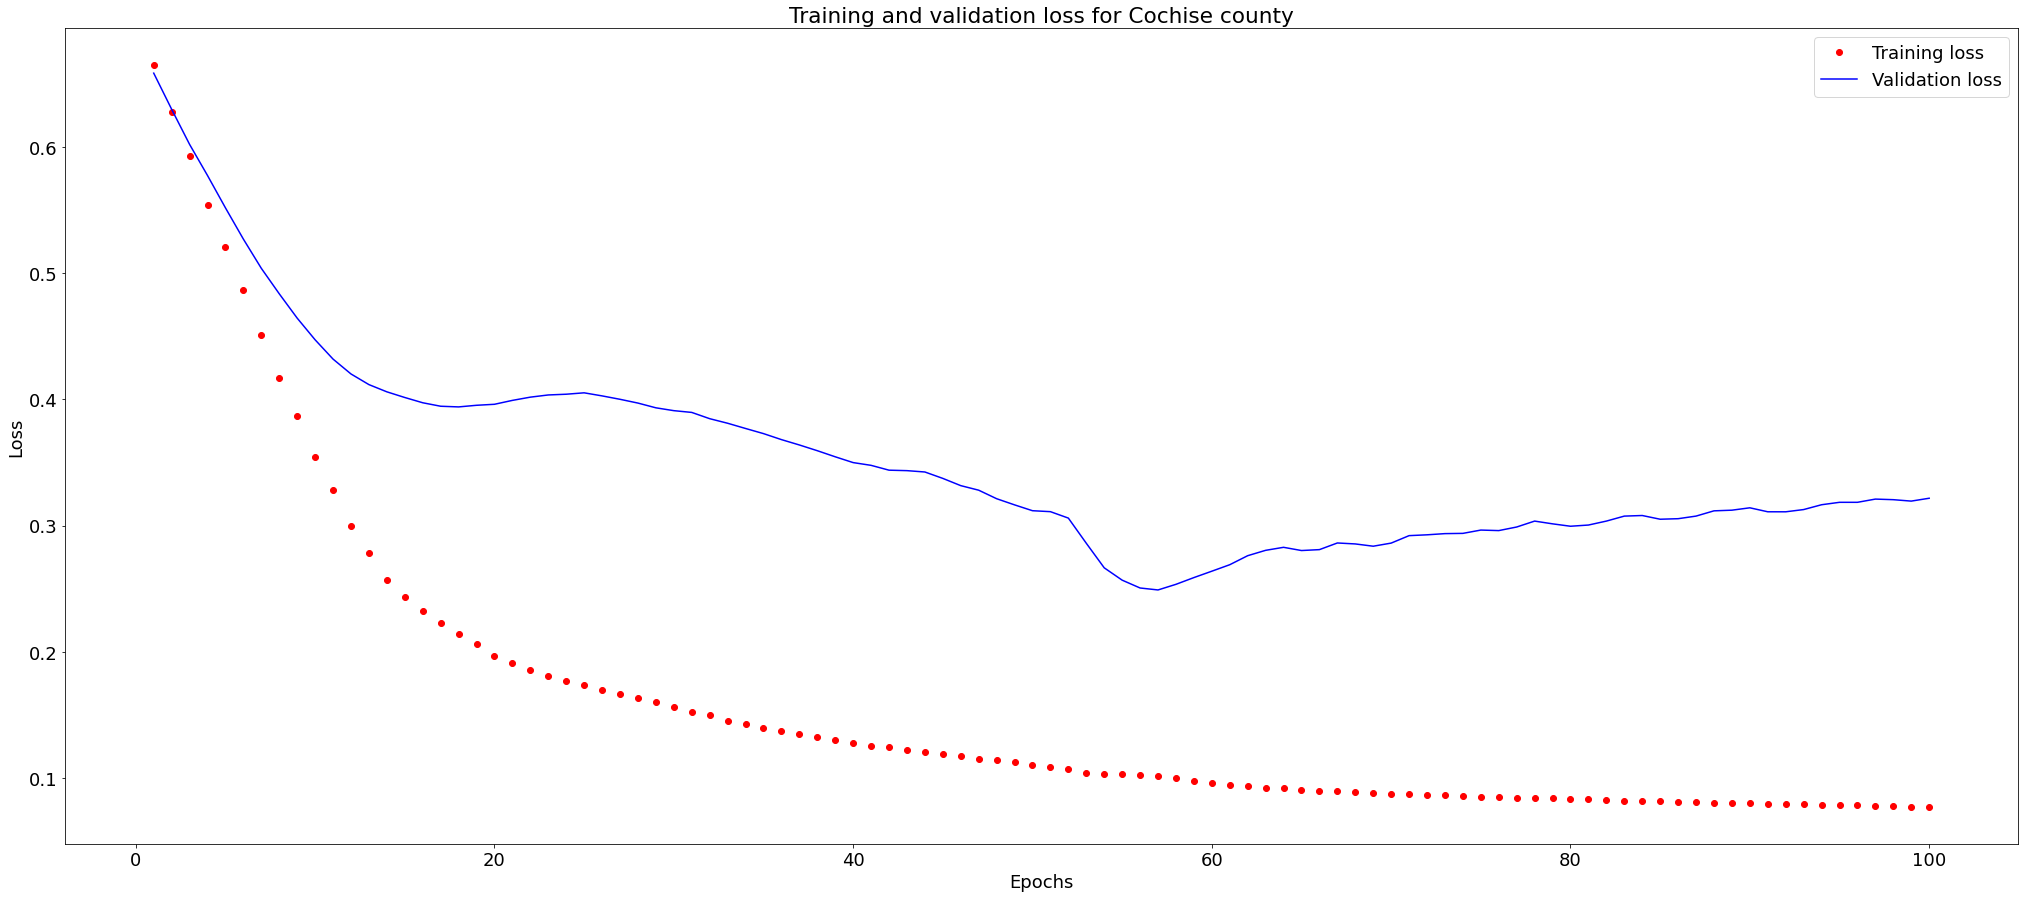

In [715]:
### Cochise training and validation graph
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['val_loss']) + 1)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss', color = 'red')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss for Cochise county')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.rcParams["figure.figsize"] = 35, 15
plt.rcParams.update({'font.size': 18})
plt.show()

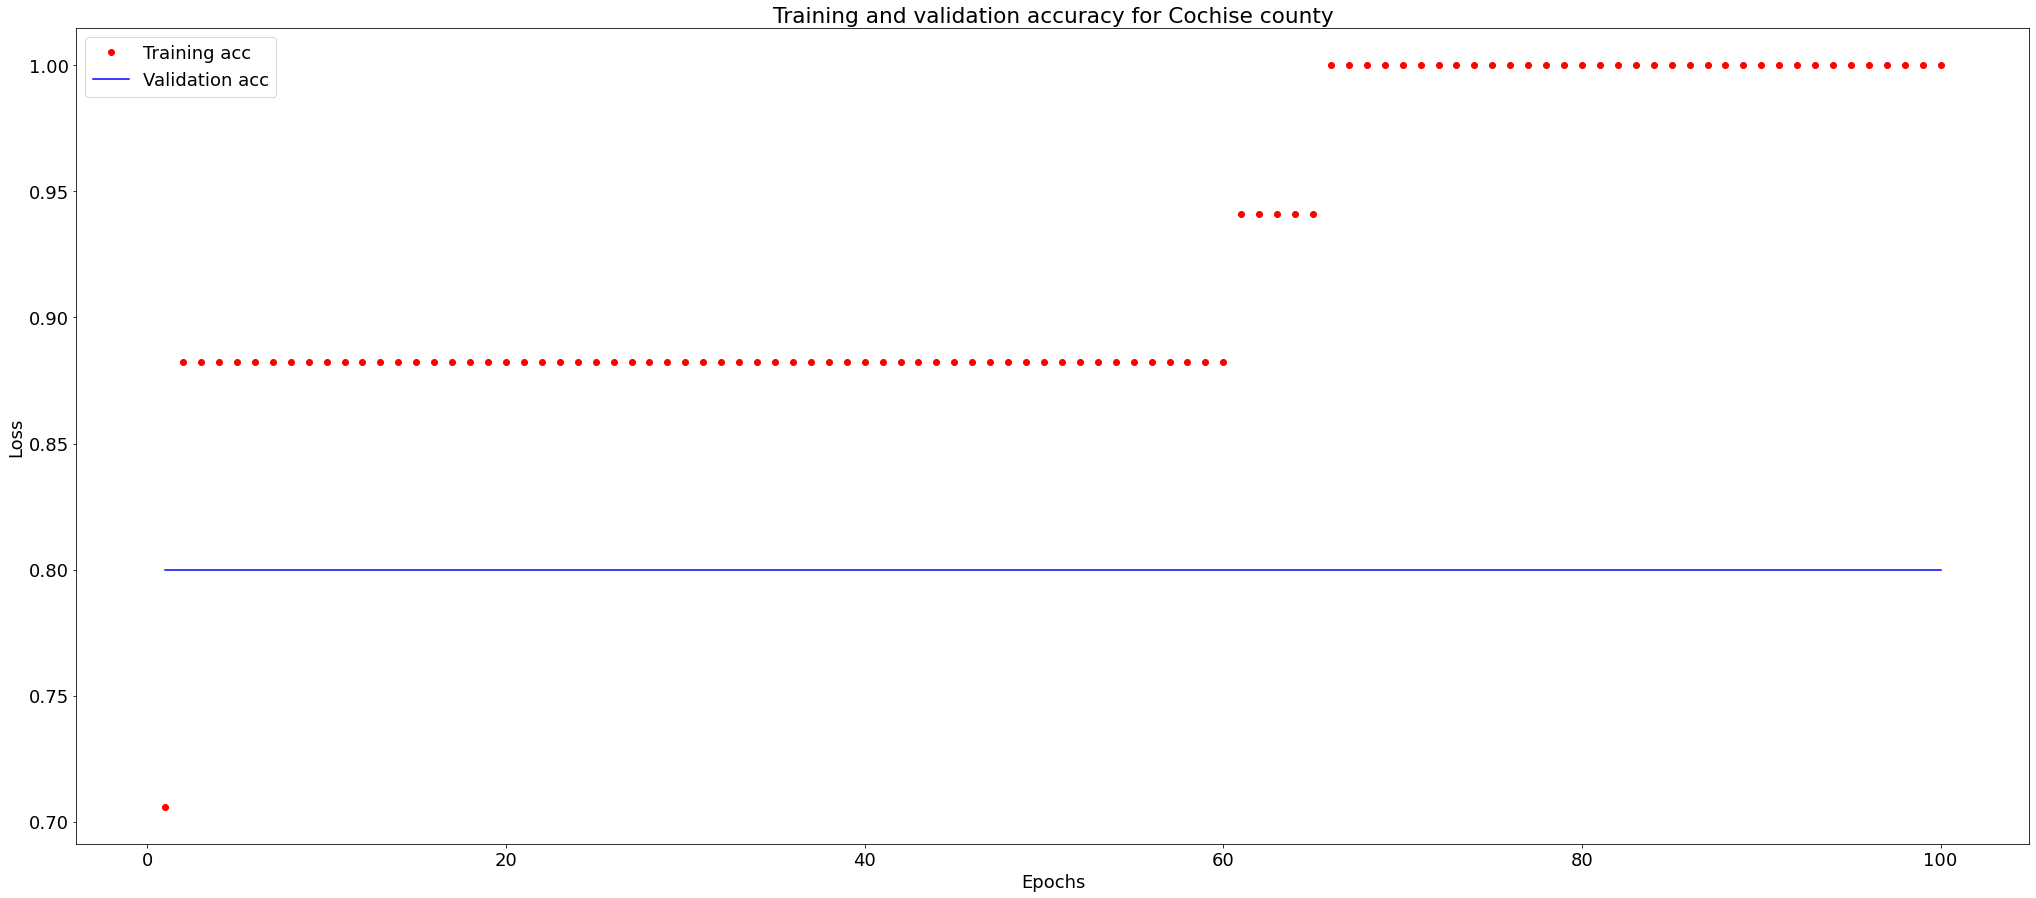

In [716]:
### Cochise training and validation accuracy graph
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label = 'Training acc', color = 'red')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy for Cochise county')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.rcParams["figure.figsize"] = 35, 15
plt.rcParams.update({'font.size': 18})
plt.show()

In [717]:
# Setting up activation, hidden, and output layers.
model = Sequential([
    Dense(units = 12, input_shape = (6,), activation = 'relu'),
    Dense(units = 36, activation = 'relu'),
    Dense(units = 6, activation = 'relu'),
    Dense(units = 2, activation = 'softmax')
])

# Compile model
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Layer summary
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_114 (Dense)            (None, 12)                84        
_________________________________________________________________
dense_115 (Dense)            (None, 36)                468       
_________________________________________________________________
dense_116 (Dense)            (None, 6)                 222       
_________________________________________________________________
dense_117 (Dense)            (None, 2)                 14        
Total params: 788
Trainable params: 788
Non-trainable params: 0
_________________________________________________________________


In [718]:
# Gila county model
gila = pd.read_csv("C:/Users/edoar/Documents/School_Documents/Fall_2021/Capstone/random_forest_files/gila.csv")

In [719]:
gila['payson_hmi'] = pd.cut(gila.payson_hmi, bins = [0, 199999, 600000], labels = ['0', '1'])
gila['payson_hmi'] = gila['payson_hmi'].astype(int)
gila

,date,payson_hmi,total_arrests,crime_rate,population_estimates,poverty_percentage,state_tax
0,2000,0,3840,4443.4,51355,17.0,14919000
1,2001,0,5406,4280.4,51165,17.0,18905000
2,2002,0,4492,4564.5,51225,17.0,23779000
3,2003,0,3845,4347.7,50906,17.0,25343000
4,2004,0,4074,4266.2,50848,18.0,27391000
5,2005,0,4205,4368.8,50914,19.0,22202000
6,2006,0,4174,4023.3,51635,20.0,27391000
7,2007,0,3849,3216.0,52231,18.2,24820000
8,2008,0,4565,3603.5,52273,16.0,18905000
9,2009,0,4519,5604.3,52199,20.7,27391000


In [720]:
# Get X and y
X = gila.drop('payson_hmi', axis = 1)
Y = gila['payson_hmi']

# Splitting training and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

# scale data
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [721]:
# Keras model
history = model.fit(x = X_train, y = y_train.values, batch_size = 8, epochs = 100, shuffle = True, verbose = 2, validation_data = (X_test, y_test.values))

Epoch 1/100
3/3 - 0s - loss: 0.5636 - accuracy: 0.8824 - val_loss: 0.7532 - val_accuracy: 0.6000
Epoch 2/100
3/3 - 0s - loss: 0.5470 - accuracy: 0.8824 - val_loss: 0.7656 - val_accuracy: 0.6000
Epoch 3/100
3/3 - 0s - loss: 0.5305 - accuracy: 0.8824 - val_loss: 0.7790 - val_accuracy: 0.6000
Epoch 4/100
3/3 - 0s - loss: 0.5174 - accuracy: 0.8824 - val_loss: 0.7945 - val_accuracy: 0.6000
Epoch 5/100
3/3 - 0s - loss: 0.5037 - accuracy: 0.8824 - val_loss: 0.8128 - val_accuracy: 0.6000
Epoch 6/100
3/3 - 0s - loss: 0.4919 - accuracy: 0.8824 - val_loss: 0.8331 - val_accuracy: 0.6000
Epoch 7/100
3/3 - 0s - loss: 0.4797 - accuracy: 0.8824 - val_loss: 0.8505 - val_accuracy: 0.6000
Epoch 8/100
3/3 - 0s - loss: 0.4672 - accuracy: 0.8824 - val_loss: 0.8638 - val_accuracy: 0.6000
Epoch 9/100
3/3 - 0s - loss: 0.4583 - accuracy: 0.8824 - val_loss: 0.8841 - val_accuracy: 0.6000
Epoch 10/100
3/3 - 0s - loss: 0.4479 - accuracy: 0.8824 - val_loss: 0.9077 - val_accuracy: 0.6000
Epoch 11/100
3/3 - 0s - loss:

Epoch 85/100
3/3 - 0s - loss: 0.1110 - accuracy: 0.8824 - val_loss: 2.3930 - val_accuracy: 0.6000
Epoch 86/100
3/3 - 0s - loss: 0.1093 - accuracy: 0.8824 - val_loss: 2.4281 - val_accuracy: 0.6000
Epoch 87/100
3/3 - 0s - loss: 0.1076 - accuracy: 0.8824 - val_loss: 2.4693 - val_accuracy: 0.6000
Epoch 88/100
3/3 - 0s - loss: 0.1060 - accuracy: 0.8824 - val_loss: 2.5165 - val_accuracy: 0.6000
Epoch 89/100
3/3 - 0s - loss: 0.1047 - accuracy: 0.8824 - val_loss: 2.5620 - val_accuracy: 0.6000
Epoch 90/100
3/3 - 0s - loss: 0.1034 - accuracy: 0.8824 - val_loss: 2.6037 - val_accuracy: 0.6000
Epoch 91/100
3/3 - 0s - loss: 0.1023 - accuracy: 0.8824 - val_loss: 2.6500 - val_accuracy: 0.6000
Epoch 92/100
3/3 - 0s - loss: 0.1013 - accuracy: 0.8824 - val_loss: 2.7011 - val_accuracy: 0.6000
Epoch 93/100
3/3 - 0s - loss: 0.1014 - accuracy: 0.8824 - val_loss: 2.7501 - val_accuracy: 0.6000
Epoch 94/100
3/3 - 0s - loss: 0.1003 - accuracy: 0.8824 - val_loss: 2.7740 - val_accuracy: 0.6000
Epoch 95/100
3/3 - 0

In [722]:
# evaluate model accuracy
_, accuracy = model.evaluate(X, Y, verbose = 0)
print('Accuracy: %.2f' % (accuracy * 100))

Accuracy: 81.82


In [723]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

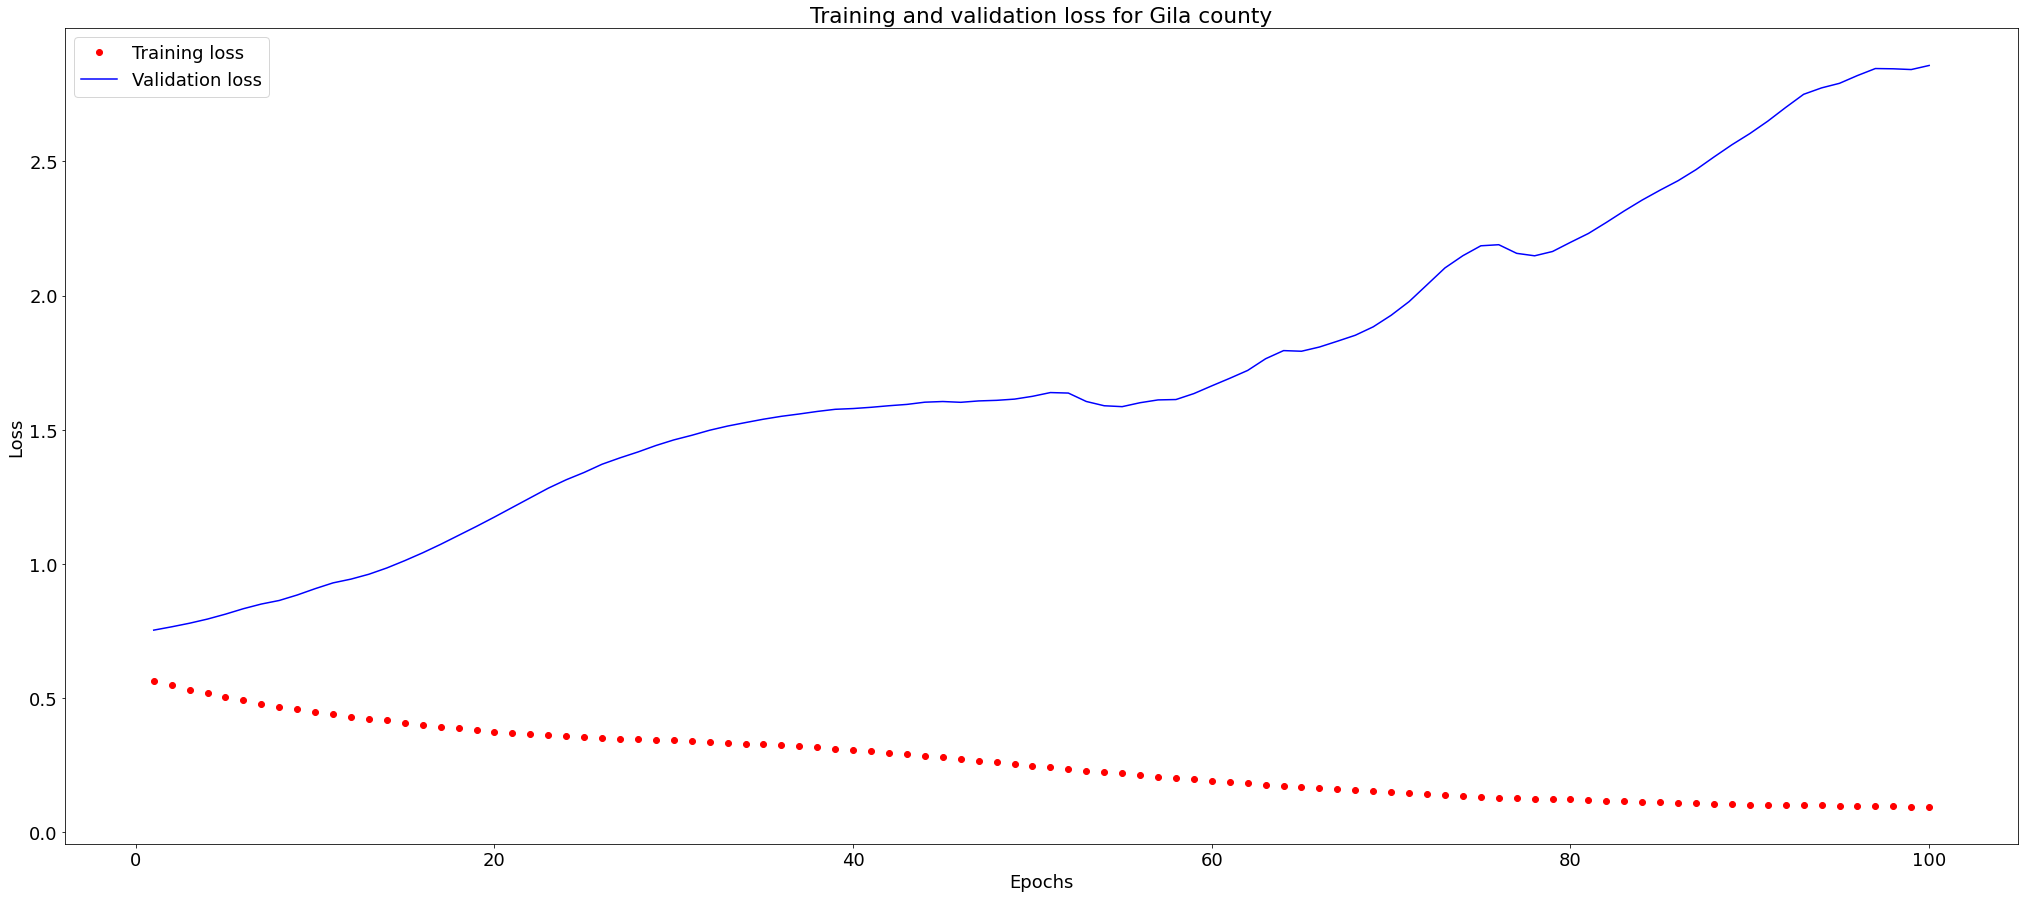

In [724]:
### Gila training and validation graph
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['val_loss']) + 1)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss', color = 'red')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss for Gila county')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.rcParams["figure.figsize"] = 35, 15
plt.rcParams.update({'font.size': 18})
plt.show()

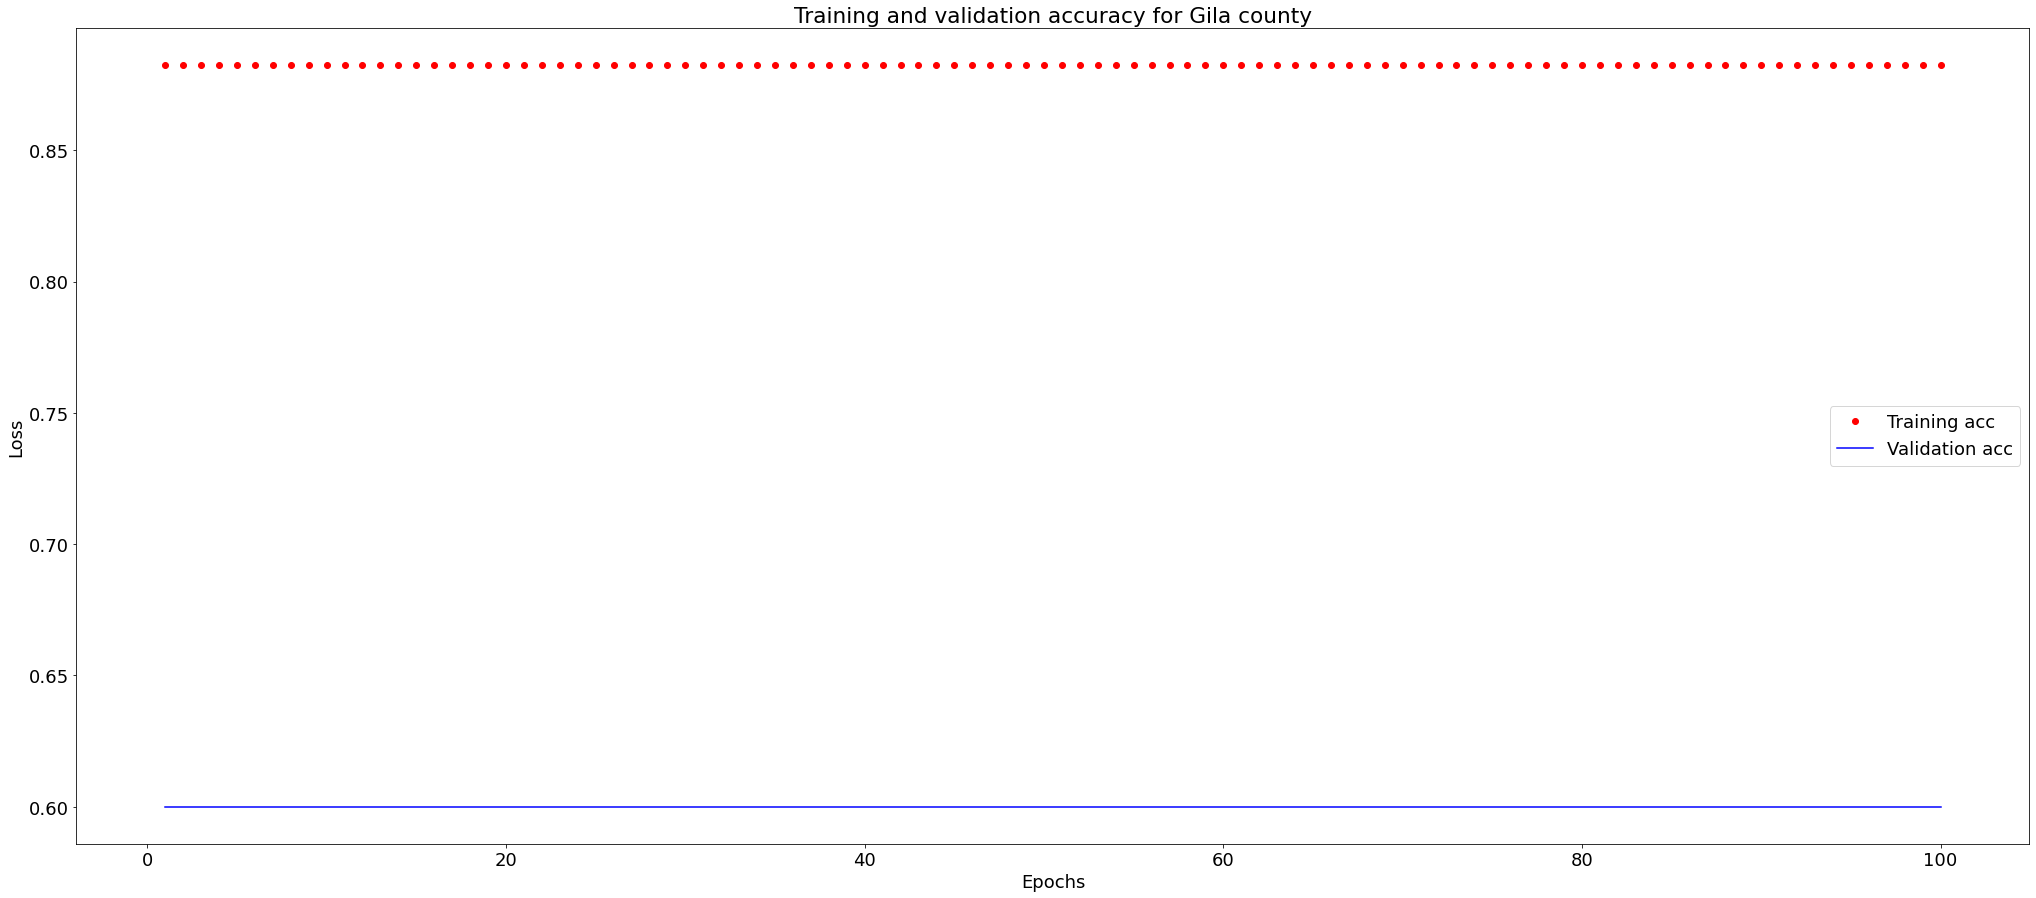

In [725]:
### Gila training and validation accuracy graph
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label = 'Training acc', color = 'red')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy for Gila county')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.rcParams["figure.figsize"] = 35, 15
plt.rcParams.update({'font.size': 18})
plt.show()

In [726]:
# Setting up activation, hidden, and output layers.
model = Sequential([
    Dense(units = 12, input_shape = (6,), activation = 'relu'),
    Dense(units = 36, activation = 'relu'),
    Dense(units = 6, activation = 'relu'),
    Dense(units = 2, activation = 'softmax')
])

# Compile model
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Layer summary
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_118 (Dense)            (None, 12)                84        
_________________________________________________________________
dense_119 (Dense)            (None, 36)                468       
_________________________________________________________________
dense_120 (Dense)            (None, 6)                 222       
_________________________________________________________________
dense_121 (Dense)            (None, 2)                 14        
Total params: 788
Trainable params: 788
Non-trainable params: 0
_________________________________________________________________


In [727]:
# Graham county model
graham = pd.read_csv("C:/Users/edoar/Documents/School_Documents/Fall_2021/Capstone/random_forest_files/graham.csv")

In [728]:
graham['safford_hmi'] = pd.cut(graham.safford_hmi, bins = [0, 199999, 600000], labels = ['0', '1'])
graham['safford_hmi'] = graham['safford_hmi'].astype(int)
graham

,date,safford_hmi,total_arrests,crime_rate,population_estimates,poverty_percentage,state_tax
0,2000,0,1563,2445.6,33541,21.0,4396000
1,2001,0,1461,2421.9,33307,22.0,2596000
2,2002,0,1378,2428.7,33120,22.0,4792000
3,2003,0,1354,2537.2,32785,20.0,2415000
4,2004,0,1286,2134.3,32441,22.0,3691000
5,2005,0,670,1146.1,32629,23.0,4396000
6,2006,0,757,2096.9,33286,23.4,3707000
7,2007,0,850,1588.2,34736,22.4,4835000
8,2008,0,1180,2136.9,36204,21.0,2415000
9,2009,0,1369,4777.7,37045,21.5,2596000


In [729]:
# Get X and y
X = graham.drop('safford_hmi', axis = 1)
Y = graham['safford_hmi']

# Splitting training and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

# scale data
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [730]:
# Keras model
history = model.fit(x = X_train, y = y_train.values, batch_size = 4, epochs = 100, shuffle = True, verbose = 2, validation_data = (X_test, y_test.values))

Epoch 1/100
5/5 - 0s - loss: 0.7014 - accuracy: 0.3529 - val_loss: 0.6771 - val_accuracy: 0.8000
Epoch 2/100
5/5 - 0s - loss: 0.6771 - accuracy: 0.9412 - val_loss: 0.6623 - val_accuracy: 1.0000
Epoch 3/100
5/5 - 0s - loss: 0.6674 - accuracy: 0.9412 - val_loss: 0.6489 - val_accuracy: 1.0000
Epoch 4/100
5/5 - 0s - loss: 0.6531 - accuracy: 0.9412 - val_loss: 0.6311 - val_accuracy: 1.0000
Epoch 5/100
5/5 - 0s - loss: 0.6353 - accuracy: 0.9412 - val_loss: 0.6104 - val_accuracy: 1.0000
Epoch 6/100
5/5 - 0s - loss: 0.6137 - accuracy: 0.9412 - val_loss: 0.5828 - val_accuracy: 1.0000
Epoch 7/100
5/5 - 0s - loss: 0.5909 - accuracy: 0.9412 - val_loss: 0.5520 - val_accuracy: 1.0000
Epoch 8/100
5/5 - 0s - loss: 0.5647 - accuracy: 0.9412 - val_loss: 0.5203 - val_accuracy: 1.0000
Epoch 9/100
5/5 - 0s - loss: 0.5362 - accuracy: 0.9412 - val_loss: 0.4858 - val_accuracy: 1.0000
Epoch 10/100
5/5 - 0s - loss: 0.5083 - accuracy: 0.9412 - val_loss: 0.4484 - val_accuracy: 1.0000
Epoch 11/100
5/5 - 0s - loss:

Epoch 85/100
5/5 - 0s - loss: 0.0579 - accuracy: 0.9412 - val_loss: 0.0350 - val_accuracy: 1.0000
Epoch 86/100
5/5 - 0s - loss: 0.0576 - accuracy: 0.9412 - val_loss: 0.0353 - val_accuracy: 1.0000
Epoch 87/100
5/5 - 0s - loss: 0.0570 - accuracy: 0.9412 - val_loss: 0.0347 - val_accuracy: 1.0000
Epoch 88/100
5/5 - 0s - loss: 0.0547 - accuracy: 0.9412 - val_loss: 0.0339 - val_accuracy: 1.0000
Epoch 89/100
5/5 - 0s - loss: 0.0532 - accuracy: 0.9412 - val_loss: 0.0346 - val_accuracy: 1.0000
Epoch 90/100
5/5 - 0s - loss: 0.0511 - accuracy: 0.9412 - val_loss: 0.0345 - val_accuracy: 1.0000
Epoch 91/100
5/5 - 0s - loss: 0.0492 - accuracy: 1.0000 - val_loss: 0.0339 - val_accuracy: 1.0000
Epoch 92/100
5/5 - 0s - loss: 0.0483 - accuracy: 1.0000 - val_loss: 0.0345 - val_accuracy: 1.0000
Epoch 93/100
5/5 - 0s - loss: 0.0465 - accuracy: 1.0000 - val_loss: 0.0346 - val_accuracy: 1.0000
Epoch 94/100
5/5 - 0s - loss: 0.0445 - accuracy: 1.0000 - val_loss: 0.0336 - val_accuracy: 1.0000
Epoch 95/100
5/5 - 0

In [731]:
# evaluate model accuracy
_, accuracy = model.evaluate(X, Y, verbose = 0)
print('Accuracy: %.2f' % (accuracy * 100))

Accuracy: 95.45


In [732]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

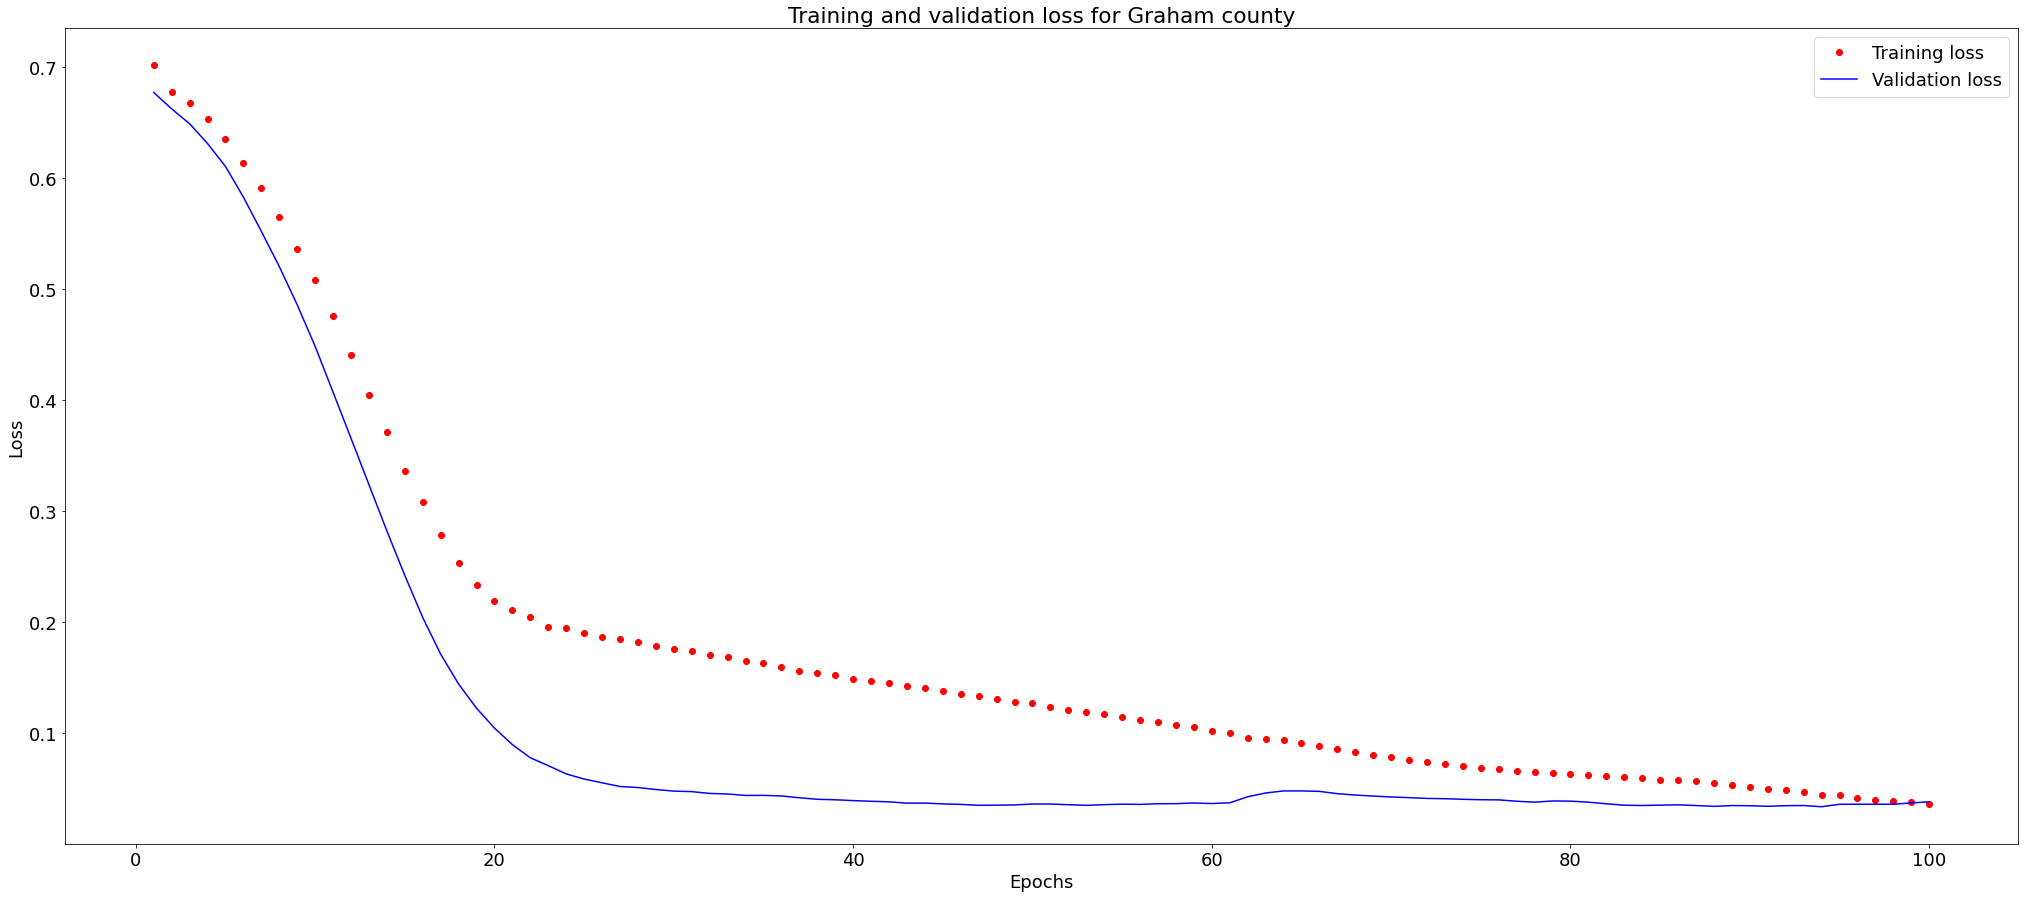

In [733]:
### Graham training and validation graph
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['val_loss']) + 1)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss', color = 'red')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss for Graham county')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.rcParams["figure.figsize"] = 35, 15
plt.rcParams.update({'font.size': 18})
plt.show()

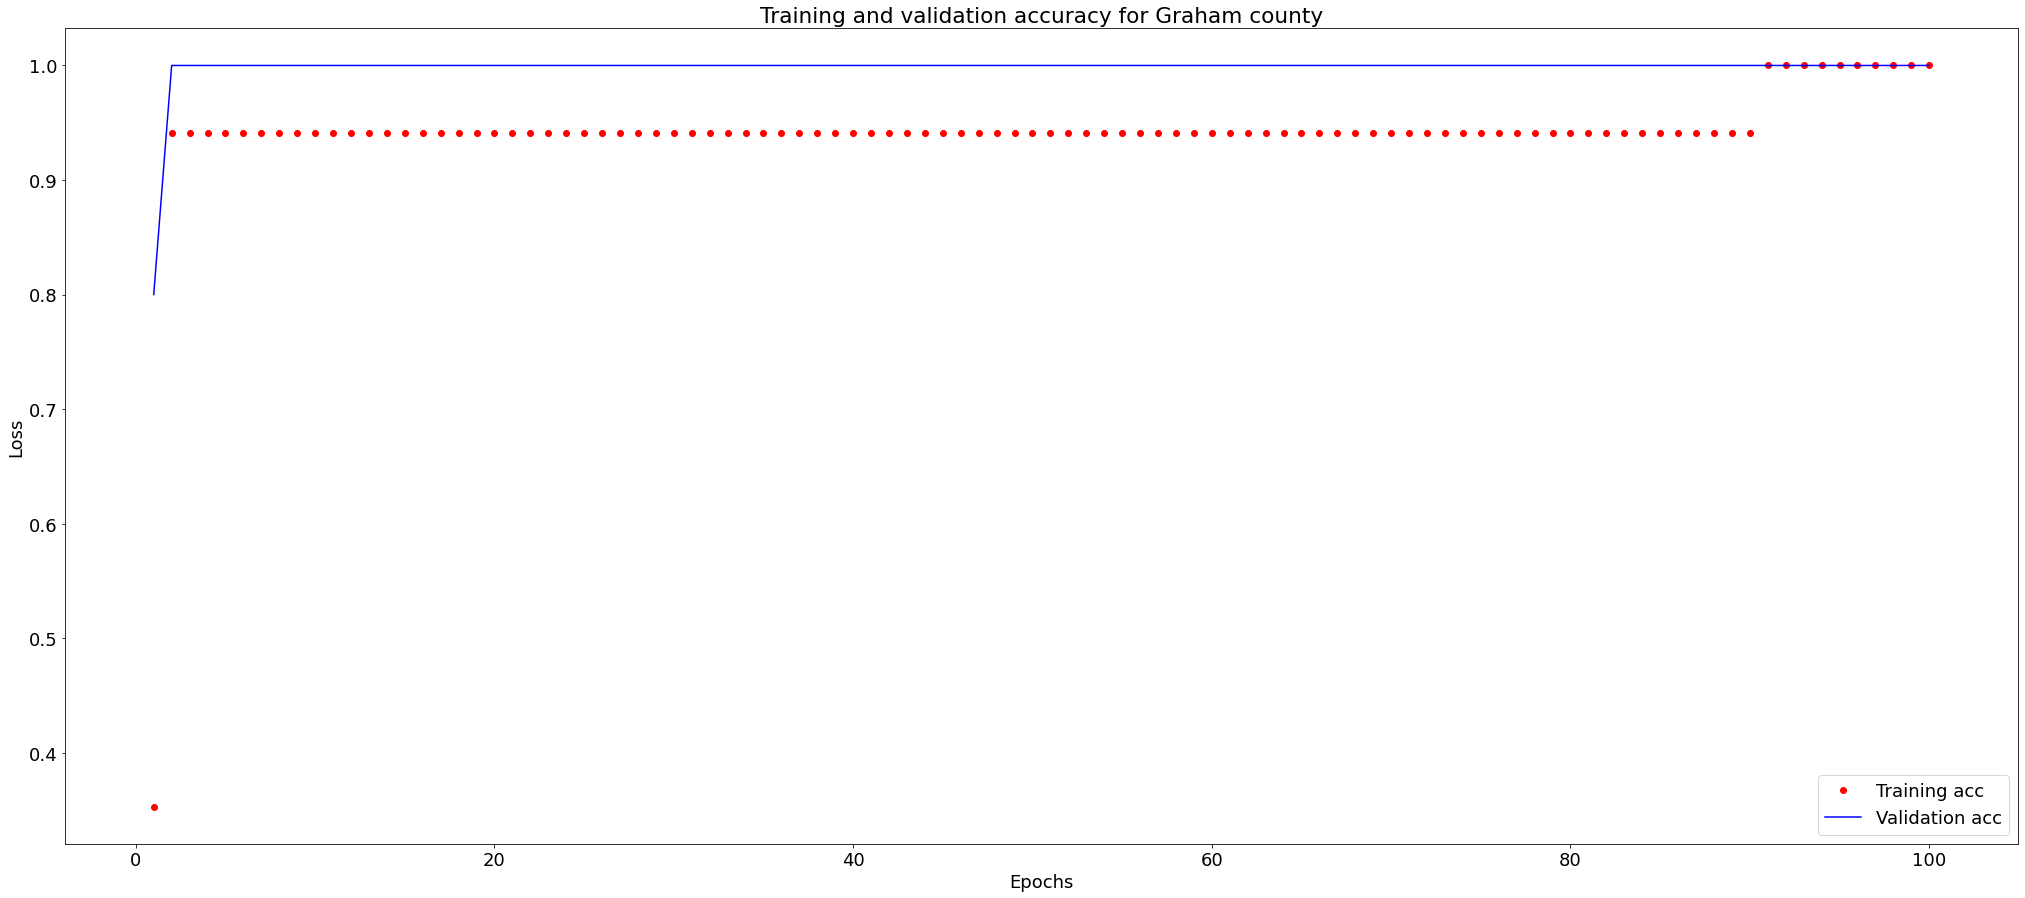

In [734]:
### Graham training and validation accuracy graph
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label = 'Training acc', color = 'red')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy for Graham county')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.rcParams["figure.figsize"] = 35, 15
plt.rcParams.update({'font.size': 18})
plt.show()

In [735]:
# Setting up activation, hidden, and output layers.
model = Sequential([
    Dense(units = 12, input_shape = (6,), activation = 'relu'),
    Dense(units = 36, activation = 'relu'),
    Dense(units = 6, activation = 'relu'),
    Dense(units = 2, activation = 'softmax')
])

# Compile model
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Layer summary
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_122 (Dense)            (None, 12)                84        
_________________________________________________________________
dense_123 (Dense)            (None, 36)                468       
_________________________________________________________________
dense_124 (Dense)            (None, 6)                 222       
_________________________________________________________________
dense_125 (Dense)            (None, 2)                 14        
Total params: 788
Trainable params: 788
Non-trainable params: 0
_________________________________________________________________


In [736]:
# Maricopa county model
maricopa = pd.read_csv("C:/Users/edoar/Documents/School_Documents/Fall_2021/Capstone/random_forest_files/maricopa.csv")

In [737]:
maricopa['phoenix_hmi'] = pd.cut(maricopa.phoenix_hmi, bins = [0, 199999, 600000], labels = ['0', '1'])
maricopa['phoenix_hmi'] = maricopa['phoenix_hmi'].astype(int)
maricopa

,date,phoenix_hmi,total_arrests,crime_rate,population_estimates,poverty_percentage,state_tax
0,2000,0,155480,6167.4,3097378,10.0,384937000
1,2001,0,149496,6183.1,3200075,11.0,528421000
2,2002,0,156126,6402.9,3299127,11.0,442961000
3,2003,0,158182,5867.1,3391391,12.0,475144000
4,2004,0,160559,5507.9,3502635,13.0,528421000
5,2005,1,147950,5080.8,3647131,12.0,554877000
6,2006,1,160996,5098.1,3776118,12.5,604492000
7,2007,1,174332,5079.7,3872962,12.9,554877000
8,2008,1,184138,5004.7,3958263,13.0,510299000
9,2009,0,187775,4457.8,4023132,15.1,564781000


In [738]:
# Get X and y
X = maricopa.drop('phoenix_hmi', axis = 1)
Y = maricopa['phoenix_hmi']

# Splitting training and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

# scale data
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [739]:
# Keras model
history = model.fit(x = X_train, y = y_train.values, batch_size = 4, epochs = 100, shuffle = True, verbose = 2, validation_data = (X_test, y_test.values))

Epoch 1/100
5/5 - 0s - loss: 0.7043 - accuracy: 0.3529 - val_loss: 0.6902 - val_accuracy: 0.8000
Epoch 2/100
5/5 - 0s - loss: 0.6966 - accuracy: 0.5294 - val_loss: 0.6884 - val_accuracy: 0.8000
Epoch 3/100
5/5 - 0s - loss: 0.6894 - accuracy: 0.5294 - val_loss: 0.6877 - val_accuracy: 0.8000
Epoch 4/100
5/5 - 0s - loss: 0.6811 - accuracy: 0.5294 - val_loss: 0.6862 - val_accuracy: 0.8000
Epoch 5/100
5/5 - 0s - loss: 0.6722 - accuracy: 0.5882 - val_loss: 0.6809 - val_accuracy: 0.6000
Epoch 6/100
5/5 - 0s - loss: 0.6652 - accuracy: 0.5882 - val_loss: 0.6761 - val_accuracy: 0.6000
Epoch 7/100
5/5 - 0s - loss: 0.6560 - accuracy: 0.5882 - val_loss: 0.6716 - val_accuracy: 0.6000
Epoch 8/100
5/5 - 0s - loss: 0.6527 - accuracy: 0.5294 - val_loss: 0.6672 - val_accuracy: 0.6000
Epoch 9/100
5/5 - 0s - loss: 0.6482 - accuracy: 0.5294 - val_loss: 0.6657 - val_accuracy: 0.6000
Epoch 10/100
5/5 - 0s - loss: 0.6448 - accuracy: 0.5294 - val_loss: 0.6657 - val_accuracy: 0.6000
Epoch 11/100
5/5 - 0s - loss:

Epoch 85/100
5/5 - 0s - loss: 0.2571 - accuracy: 0.9412 - val_loss: 0.5567 - val_accuracy: 0.6000
Epoch 86/100
5/5 - 0s - loss: 0.2512 - accuracy: 1.0000 - val_loss: 0.5421 - val_accuracy: 0.6000
Epoch 87/100
5/5 - 0s - loss: 0.2447 - accuracy: 1.0000 - val_loss: 0.5367 - val_accuracy: 0.6000
Epoch 88/100
5/5 - 0s - loss: 0.2416 - accuracy: 1.0000 - val_loss: 0.5371 - val_accuracy: 0.6000
Epoch 89/100
5/5 - 0s - loss: 0.2333 - accuracy: 1.0000 - val_loss: 0.5426 - val_accuracy: 0.6000
Epoch 90/100
5/5 - 0s - loss: 0.2215 - accuracy: 1.0000 - val_loss: 0.5526 - val_accuracy: 0.6000
Epoch 91/100
5/5 - 0s - loss: 0.2161 - accuracy: 1.0000 - val_loss: 0.5666 - val_accuracy: 0.6000
Epoch 92/100
5/5 - 0s - loss: 0.2081 - accuracy: 1.0000 - val_loss: 0.5752 - val_accuracy: 0.6000
Epoch 93/100
5/5 - 0s - loss: 0.2038 - accuracy: 1.0000 - val_loss: 0.5986 - val_accuracy: 0.6000
Epoch 94/100
5/5 - 0s - loss: 0.1991 - accuracy: 1.0000 - val_loss: 0.6147 - val_accuracy: 0.6000
Epoch 95/100
5/5 - 0

In [740]:
# evaluate model accuracy
_, accuracy = model.evaluate(X, Y, verbose = 0)
print('Accuracy: %.2f' % (accuracy * 100))

Accuracy: 45.45


In [741]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

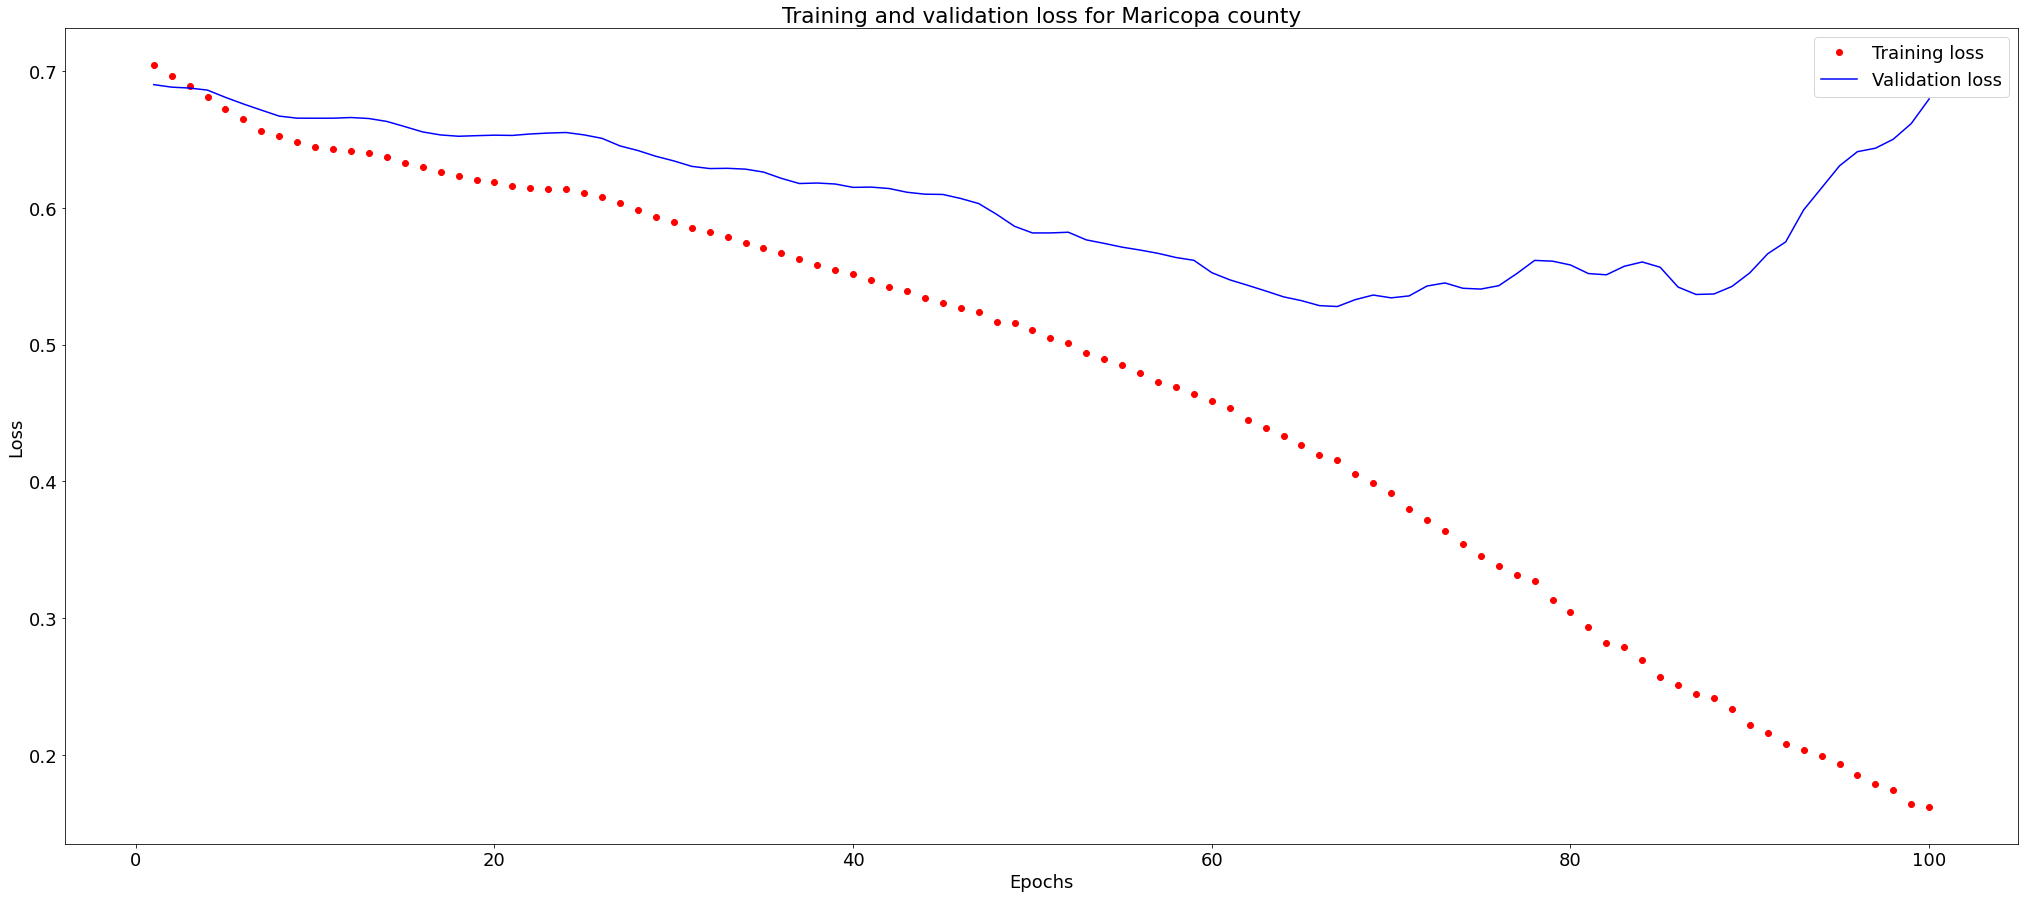

In [742]:
### Maricopa training and validation graph
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['val_loss']) + 1)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss', color = 'red')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss for Maricopa county')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.rcParams["figure.figsize"] = 35, 15
plt.rcParams.update({'font.size': 18})
plt.show()

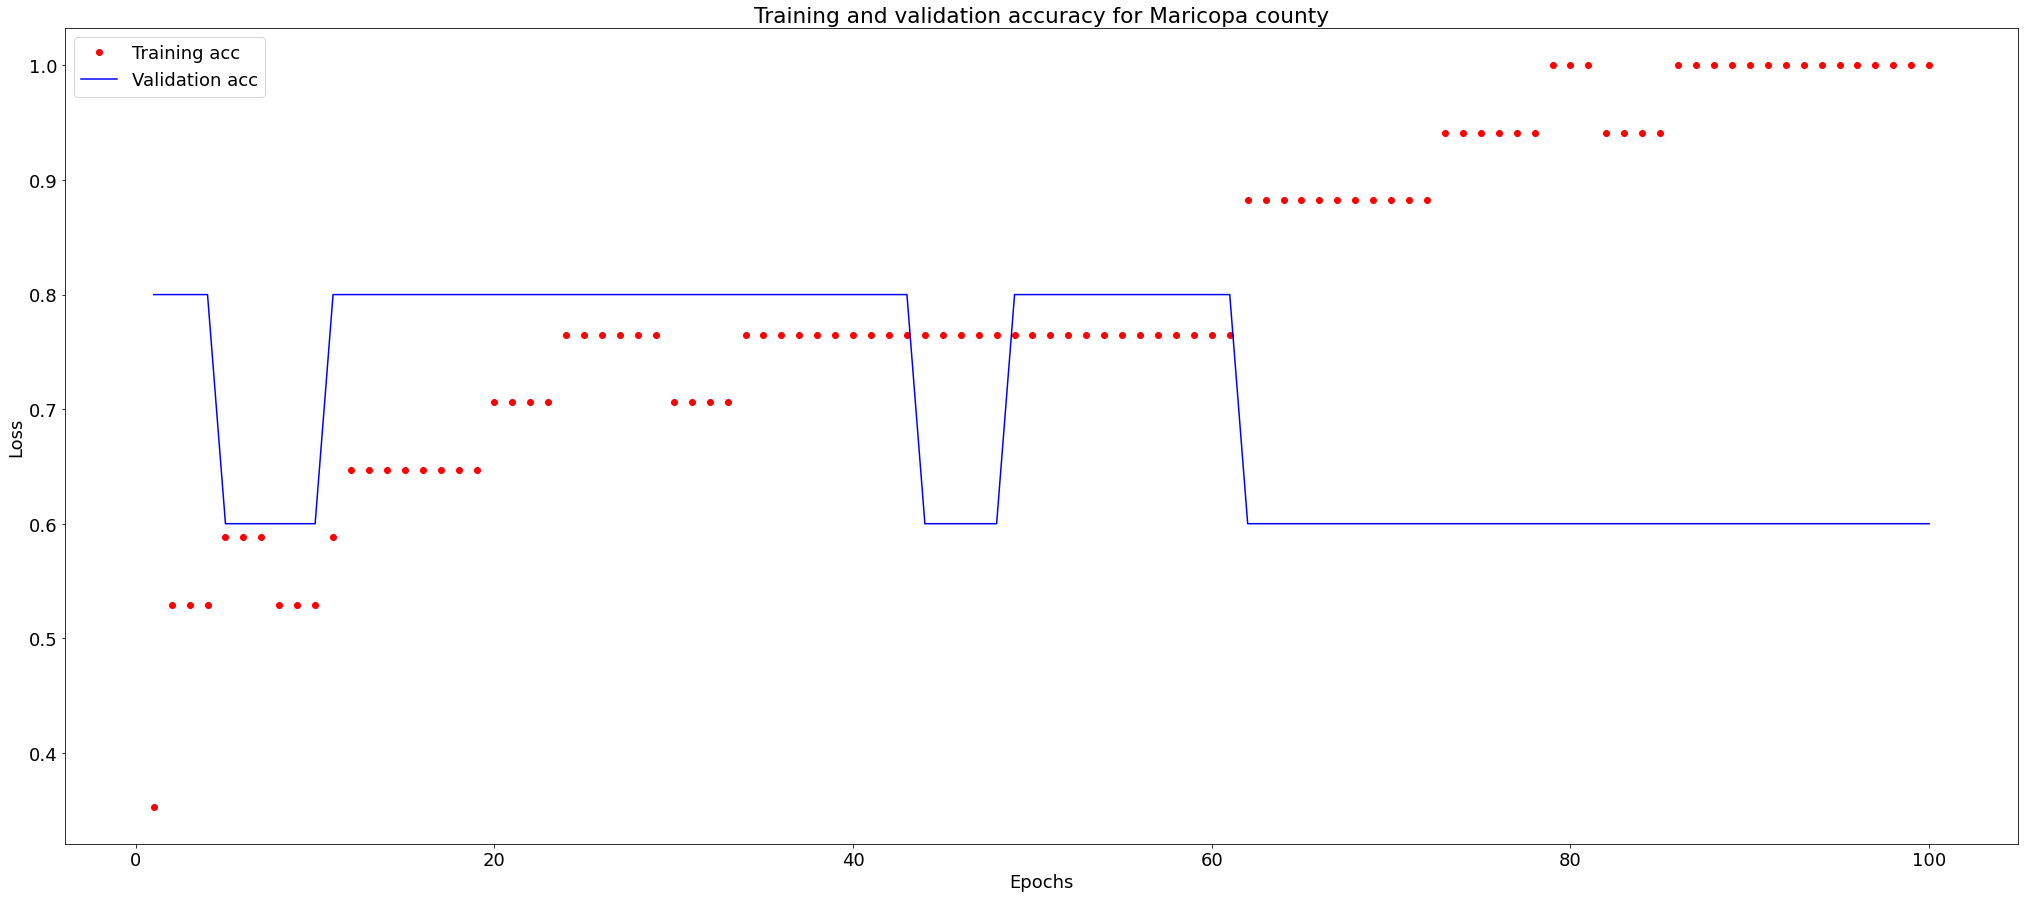

In [743]:
### Maricopa training and validation accuracy graph
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label = 'Training acc', color = 'red')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy for Maricopa county')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.rcParams["figure.figsize"] = 35, 15
plt.rcParams.update({'font.size': 18})
plt.show()

In [744]:
# Setting up activation, hidden, and output layers.
model = Sequential([
    Dense(units = 12, input_shape = (6,), activation = 'relu'),
    Dense(units = 36, activation = 'relu'),
    Dense(units = 6, activation = 'relu'),
    Dense(units = 2, activation = 'softmax')
])

# Compile model
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Layer summary
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_126 (Dense)            (None, 12)                84        
_________________________________________________________________
dense_127 (Dense)            (None, 36)                468       
_________________________________________________________________
dense_128 (Dense)            (None, 6)                 222       
_________________________________________________________________
dense_129 (Dense)            (None, 2)                 14        
Total params: 788
Trainable params: 788
Non-trainable params: 0
_________________________________________________________________


In [745]:
# Mohave county model
mohave = pd.read_csv("C:/Users/edoar/Documents/School_Documents/Fall_2021/Capstone/random_forest_files/mohave.csv")

In [746]:
mohave['lake_havasu_city_hmi'] = pd.cut(mohave.lake_havasu_city_hmi, bins = [0, 199999, 600000], labels = ['0', '1'])
mohave['lake_havasu_city_hmi'] = mohave['lake_havasu_city_hmi'].astype(int)
mohave

,date,lake_havasu_city_hmi,total_arrests,crime_rate,population_estimates,poverty_percentage,state_tax
0,2000,0,11459,4936.4,156194,15.0,26588000
1,2001,0,11212,5221.6,159840,16.0,29325000
2,2002,0,11910,5489.4,165177,15.0,27522000
3,2003,0,13953,6344.7,171019,14.0,29325000
4,2004,0,15840,6308.2,178313,15.0,32768000
5,2005,1,16608,6145.2,185940,15.0,43663000
6,2006,1,17255,5580.1,192724,16.0,49790000
7,2007,1,16705,5384.3,195852,13.5,54301000
8,2008,1,15808,4336.3,195601,17.0,51325000
9,2009,0,15855,3984.7,194825,17.8,59585000


In [747]:
# Get X and y
X = mohave.drop('lake_havasu_city_hmi', axis = 1)
Y = mohave['lake_havasu_city_hmi']

# Splitting training and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

# scale data
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [748]:
# Keras model
history = model.fit(x = X_train, y = y_train.values, batch_size = 4, epochs = 100, shuffle = True, verbose = 2, validation_data = (X_test, y_test.values))

Epoch 1/100
5/5 - 0s - loss: 0.6706 - accuracy: 0.6471 - val_loss: 0.7140 - val_accuracy: 0.6000
Epoch 2/100
5/5 - 0s - loss: 0.6578 - accuracy: 0.6471 - val_loss: 0.7079 - val_accuracy: 0.6000
Epoch 3/100
5/5 - 0s - loss: 0.6504 - accuracy: 0.6471 - val_loss: 0.7015 - val_accuracy: 0.6000
Epoch 4/100
5/5 - 0s - loss: 0.6461 - accuracy: 0.6471 - val_loss: 0.6945 - val_accuracy: 0.6000
Epoch 5/100
5/5 - 0s - loss: 0.6379 - accuracy: 0.6471 - val_loss: 0.6825 - val_accuracy: 0.6000
Epoch 6/100
5/5 - 0s - loss: 0.6309 - accuracy: 0.6471 - val_loss: 0.6727 - val_accuracy: 0.6000
Epoch 7/100
5/5 - 0s - loss: 0.6221 - accuracy: 0.6471 - val_loss: 0.6671 - val_accuracy: 0.6000
Epoch 8/100
5/5 - 0s - loss: 0.6150 - accuracy: 0.6471 - val_loss: 0.6605 - val_accuracy: 0.6000
Epoch 9/100
5/5 - 0s - loss: 0.6056 - accuracy: 0.6471 - val_loss: 0.6551 - val_accuracy: 0.6000
Epoch 10/100
5/5 - 0s - loss: 0.5991 - accuracy: 0.6471 - val_loss: 0.6477 - val_accuracy: 0.6000
Epoch 11/100
5/5 - 0s - loss:

Epoch 85/100
5/5 - 0s - loss: 0.2331 - accuracy: 1.0000 - val_loss: 1.3552 - val_accuracy: 0.8000
Epoch 86/100
5/5 - 0s - loss: 0.2275 - accuracy: 1.0000 - val_loss: 1.3677 - val_accuracy: 0.8000
Epoch 87/100
5/5 - 0s - loss: 0.2264 - accuracy: 1.0000 - val_loss: 1.3333 - val_accuracy: 0.8000
Epoch 88/100
5/5 - 0s - loss: 0.2180 - accuracy: 1.0000 - val_loss: 1.3612 - val_accuracy: 0.8000
Epoch 89/100
5/5 - 0s - loss: 0.2187 - accuracy: 1.0000 - val_loss: 1.3914 - val_accuracy: 0.8000
Epoch 90/100
5/5 - 0s - loss: 0.2108 - accuracy: 1.0000 - val_loss: 1.3864 - val_accuracy: 0.8000
Epoch 91/100
5/5 - 0s - loss: 0.2064 - accuracy: 1.0000 - val_loss: 1.3952 - val_accuracy: 0.8000
Epoch 92/100
5/5 - 0s - loss: 0.2056 - accuracy: 1.0000 - val_loss: 1.4061 - val_accuracy: 0.8000
Epoch 93/100
5/5 - 0s - loss: 0.2010 - accuracy: 1.0000 - val_loss: 1.4515 - val_accuracy: 0.8000
Epoch 94/100
5/5 - 0s - loss: 0.1962 - accuracy: 1.0000 - val_loss: 1.4863 - val_accuracy: 0.8000
Epoch 95/100
5/5 - 0

In [749]:
# evaluate model accuracy
_, accuracy = model.evaluate(X, Y, verbose = 0)
print('Accuracy: %.2f' % (accuracy * 100))

Accuracy: 63.64


In [750]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

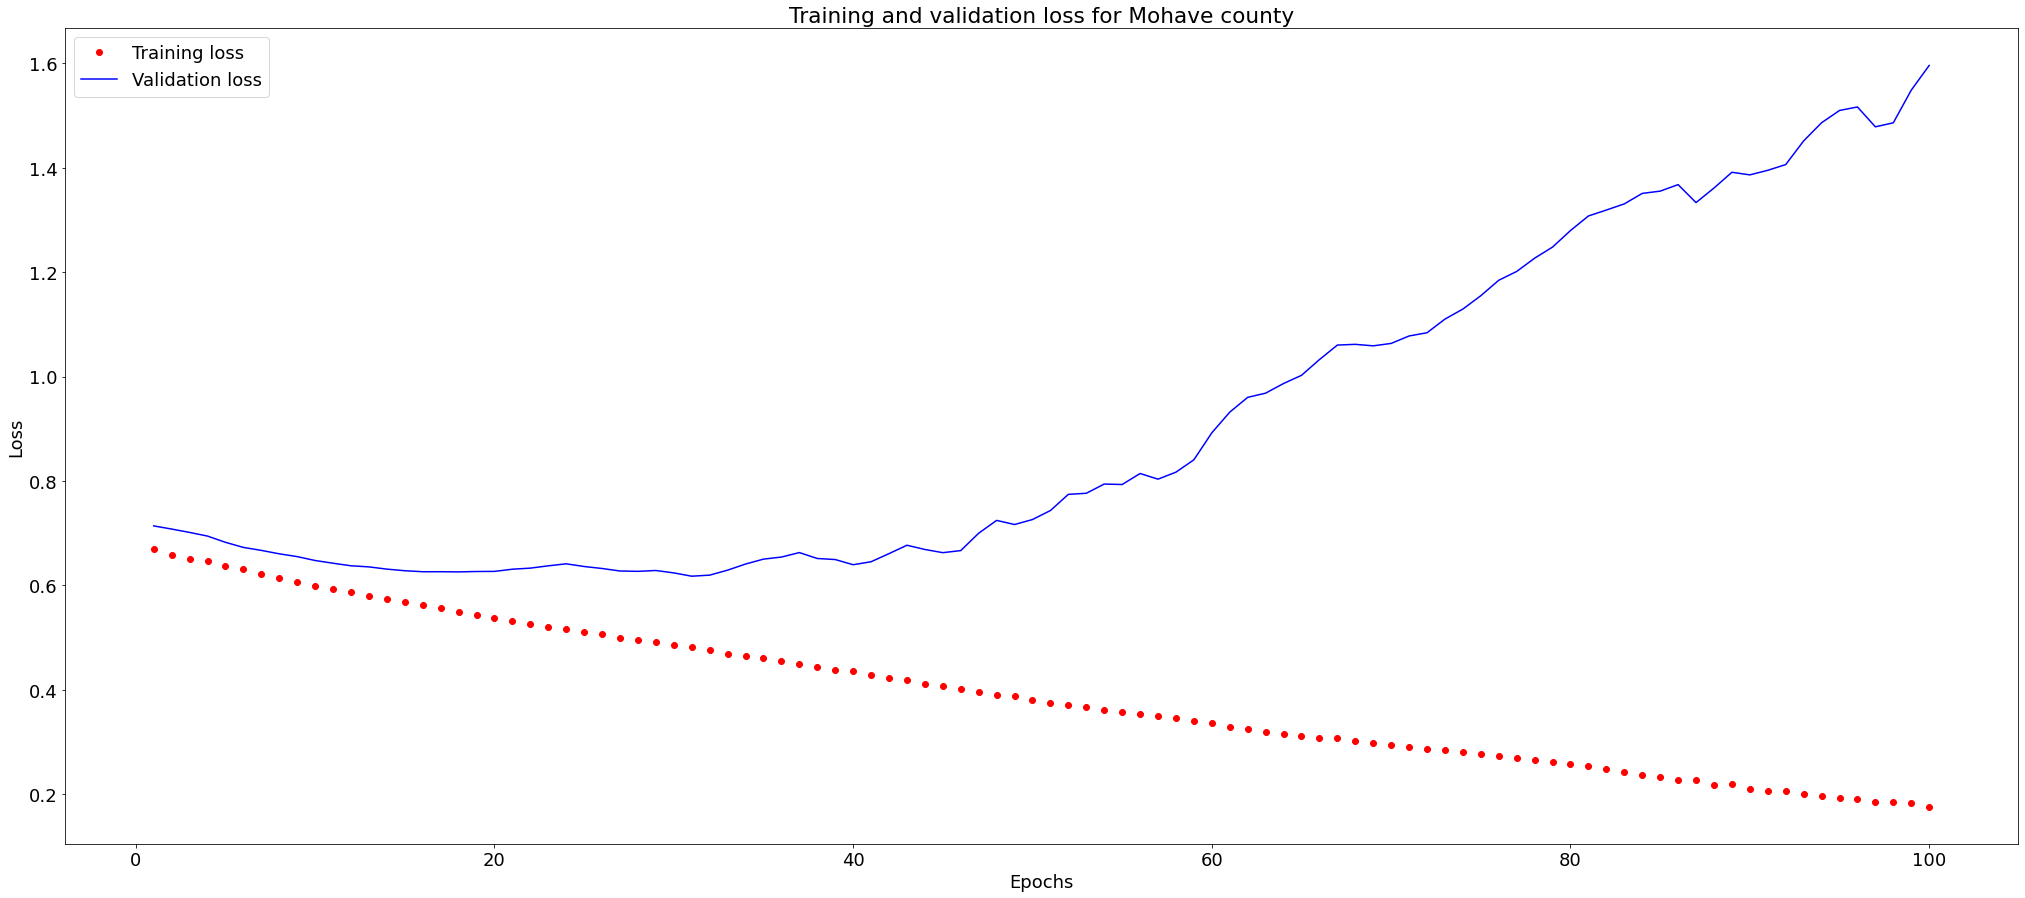

In [751]:
### Mohave training and validation graph
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['val_loss']) + 1)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss', color = 'red')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss for Mohave county')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.rcParams["figure.figsize"] = 35, 15
plt.rcParams.update({'font.size': 18})
plt.show()

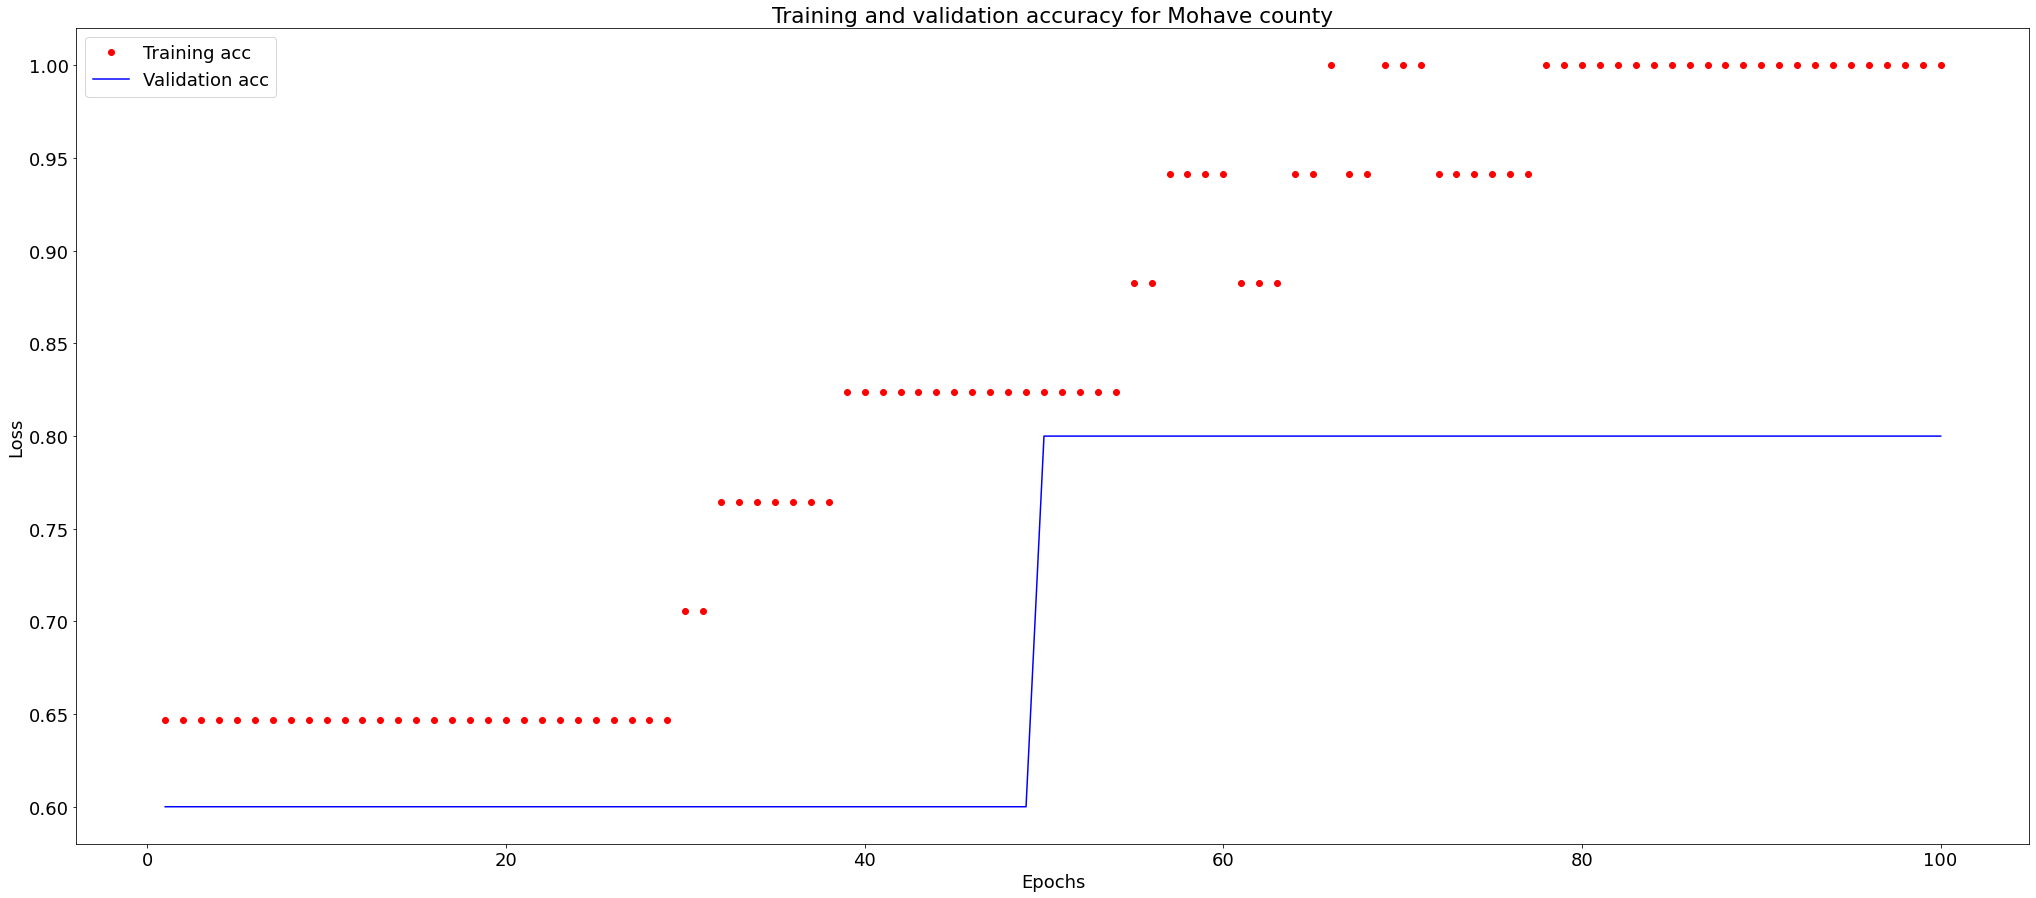

In [752]:
### Mohave training and validation accuracy graph
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label = 'Training acc', color = 'red')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy for Mohave county')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.rcParams["figure.figsize"] = 35, 15
plt.rcParams.update({'font.size': 18})
plt.show()

In [753]:
# Setting up activation, hidden, and output layers.
model = Sequential([
    Dense(units = 12, input_shape = (6,), activation = 'relu'),
    Dense(units = 36, activation = 'relu'),
    Dense(units = 6, activation = 'relu'),
    Dense(units = 2, activation = 'softmax')
])

# Compile model
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Layer summary
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_130 (Dense)            (None, 12)                84        
_________________________________________________________________
dense_131 (Dense)            (None, 36)                468       
_________________________________________________________________
dense_132 (Dense)            (None, 6)                 222       
_________________________________________________________________
dense_133 (Dense)            (None, 2)                 14        
Total params: 788
Trainable params: 788
Non-trainable params: 0
_________________________________________________________________


In [754]:
# Navajo county model
navajo = pd.read_csv("C:/Users/edoar/Documents/School_Documents/Fall_2021/Capstone/random_forest_files/navajo.csv")

In [755]:
navajo['show_low_hmi'] = pd.cut(navajo.show_low_hmi, bins = [0, 199999, 600000], labels = ['0', '1'])
navajo['show_low_hmi'] = navajo['show_low_hmi'].astype(int)
navajo

,date,show_low_hmi,total_arrests,crime_rate,population_estimates,poverty_percentage,state_tax
0,2000,0,5893,3433.9,97876,24.0,4246000
1,2001,0,6019,3403.9,98549,24.0,12543000
2,2002,0,6116,3436.2,101358,24.0,13005000
3,2003,0,6021,3797.0,103220,21.0,12294000
4,2004,0,6609,3378.5,105020,23.0,17950000
5,2005,0,6365,3344.9,106968,28.0,12132000
6,2006,0,6612,2926.0,109000,24.4,17950000
7,2007,0,6890,2866.7,110999,23.4,12613000
8,2008,0,7490,3085.9,112348,23.0,17950000
9,2009,0,6771,3053.0,112975,27.4,10935000


In [756]:
# Get X and y
X = navajo.drop('show_low_hmi', axis = 1)
Y = navajo['show_low_hmi']

# Splitting training and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

# scale data
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [757]:
# Keras model
history = model.fit(x = X_train, y = y_train.values, batch_size = 4, epochs = 100, shuffle = True, verbose = 2, validation_data = (X_test, y_test.values))

Epoch 1/100
5/5 - 0s - loss: 0.7513 - accuracy: 0.1176 - val_loss: 0.6978 - val_accuracy: 0.4000
Epoch 2/100
5/5 - 0s - loss: 0.7134 - accuracy: 0.2353 - val_loss: 0.6909 - val_accuracy: 0.6000
Epoch 3/100
5/5 - 0s - loss: 0.6846 - accuracy: 0.6471 - val_loss: 0.6862 - val_accuracy: 0.6000
Epoch 4/100
5/5 - 0s - loss: 0.6658 - accuracy: 0.8824 - val_loss: 0.6781 - val_accuracy: 0.6000
Epoch 5/100
5/5 - 0s - loss: 0.6421 - accuracy: 0.8824 - val_loss: 0.6713 - val_accuracy: 0.6000
Epoch 6/100
5/5 - 0s - loss: 0.6204 - accuracy: 0.8824 - val_loss: 0.6644 - val_accuracy: 0.6000
Epoch 7/100
5/5 - 0s - loss: 0.5885 - accuracy: 0.8824 - val_loss: 0.6592 - val_accuracy: 0.6000
Epoch 8/100
5/5 - 0s - loss: 0.5636 - accuracy: 0.8824 - val_loss: 0.6550 - val_accuracy: 0.6000
Epoch 9/100
5/5 - 0s - loss: 0.5315 - accuracy: 0.8824 - val_loss: 0.6506 - val_accuracy: 0.6000
Epoch 10/100
5/5 - 0s - loss: 0.5088 - accuracy: 0.8824 - val_loss: 0.6549 - val_accuracy: 0.6000
Epoch 11/100
5/5 - 0s - loss:

Epoch 85/100
5/5 - 0s - loss: 0.1110 - accuracy: 1.0000 - val_loss: 0.3543 - val_accuracy: 1.0000
Epoch 86/100
5/5 - 0s - loss: 0.1056 - accuracy: 1.0000 - val_loss: 0.3485 - val_accuracy: 1.0000
Epoch 87/100
5/5 - 0s - loss: 0.1011 - accuracy: 0.9412 - val_loss: 0.3443 - val_accuracy: 1.0000
Epoch 88/100
5/5 - 0s - loss: 0.1046 - accuracy: 0.9412 - val_loss: 0.3421 - val_accuracy: 1.0000
Epoch 89/100
5/5 - 0s - loss: 0.1033 - accuracy: 0.9412 - val_loss: 0.3375 - val_accuracy: 1.0000
Epoch 90/100
5/5 - 0s - loss: 0.0984 - accuracy: 0.9412 - val_loss: 0.3343 - val_accuracy: 1.0000
Epoch 91/100
5/5 - 0s - loss: 0.0975 - accuracy: 0.9412 - val_loss: 0.3337 - val_accuracy: 1.0000
Epoch 92/100
5/5 - 0s - loss: 0.0917 - accuracy: 1.0000 - val_loss: 0.3339 - val_accuracy: 0.8000
Epoch 93/100
5/5 - 0s - loss: 0.0876 - accuracy: 1.0000 - val_loss: 0.3334 - val_accuracy: 0.8000
Epoch 94/100
5/5 - 0s - loss: 0.0891 - accuracy: 1.0000 - val_loss: 0.3315 - val_accuracy: 0.8000
Epoch 95/100
5/5 - 0

In [758]:
# evaluate model accuracy
_, accuracy = model.evaluate(X, Y, verbose = 0)
print('Accuracy: %.2f' % (accuracy * 100))

Accuracy: 81.82


In [759]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

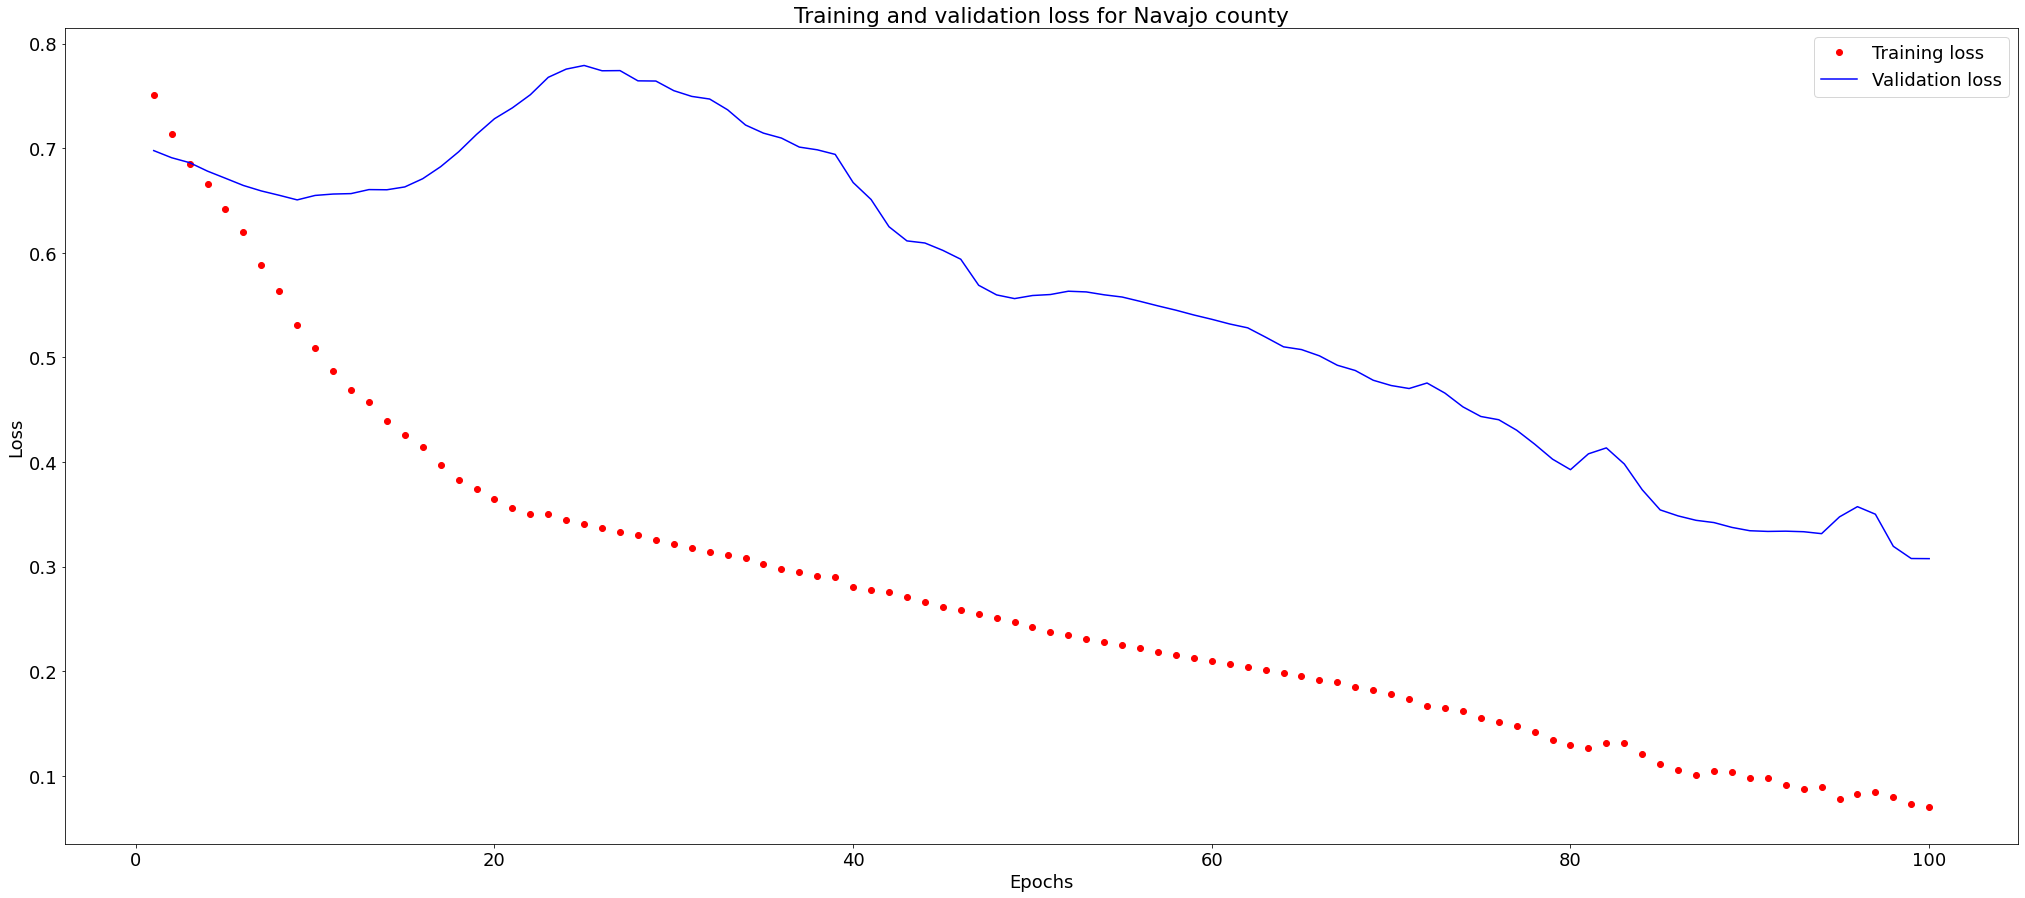

In [760]:
### Navajo training and validation graph
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['val_loss']) + 1)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss', color = 'red')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss for Navajo county')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.rcParams["figure.figsize"] = 35, 15
plt.rcParams.update({'font.size': 18})
plt.show()

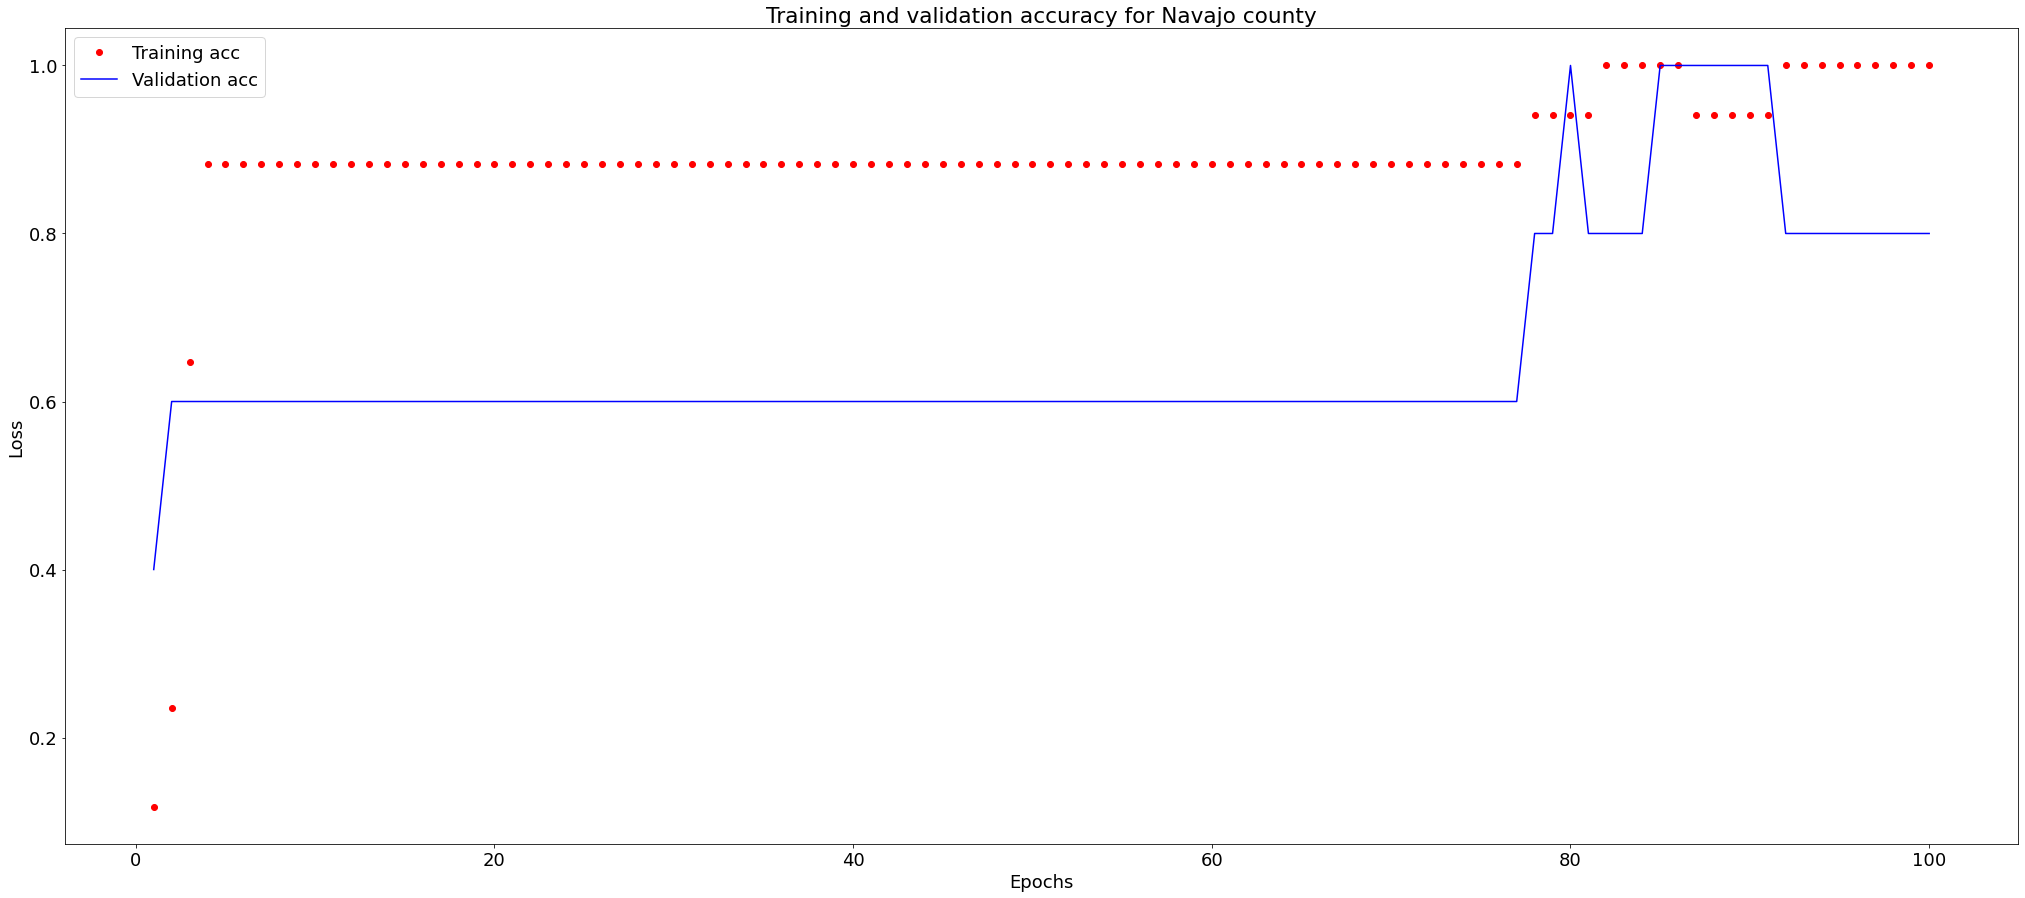

In [761]:
### Navajo training and validation accuracy graph
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label = 'Training acc', color = 'red')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy for Navajo county')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.rcParams["figure.figsize"] = 35, 15
plt.rcParams.update({'font.size': 18})
plt.show()

In [762]:
# Setting up activation, hidden, and output layers.
model = Sequential([
    Dense(units = 12, input_shape = (6,), activation = 'relu'),
    Dense(units = 36, activation = 'relu'),
    Dense(units = 6, activation = 'relu'),
    Dense(units = 2, activation = 'softmax')
])

# Compile model
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Layer summary
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_134 (Dense)            (None, 12)                84        
_________________________________________________________________
dense_135 (Dense)            (None, 36)                468       
_________________________________________________________________
dense_136 (Dense)            (None, 6)                 222       
_________________________________________________________________
dense_137 (Dense)            (None, 2)                 14        
Total params: 788
Trainable params: 788
Non-trainable params: 0
_________________________________________________________________


In [763]:
# Pima county model
pima = pd.read_csv("C:/Users/edoar/Documents/School_Documents/Fall_2021/Capstone/random_forest_files/pima.csv")

In [764]:
pima['tucson_hmi'] = pd.cut(pima.tucson_hmi, bins = [0, 199999, 600000], labels = ['0', '1'])
pima['tucson_hmi'] = pima['tucson_hmi'].astype(int)
pima

,date,tucson_hmi,total_arrests,crime_rate,population_estimates,poverty_percentage,state_tax
0,2000,0,64739,7628.0,848521,13.0,237006000
1,2001,0,67030,8131.8,865694,13.0,300972000
2,2002,0,70134,8218.9,886063,14.0,244806000
3,2003,0,70399,8330.8,903320,14.0,258376000
4,2004,0,70070,8280.0,924205,15.0,279527000
5,2005,1,68340,6565.8,948965,14.0,300972000
6,2006,1,64130,4318.4,975476,15.3,321475000
7,2007,1,68849,4101.5,996593,14.9,423443000
8,2008,1,68105,3949.6,1009832,15.0,381861000
9,2009,0,68679,3843.9,1020200,18.9,396239000


In [765]:
# Get X and y
X = pima.drop('tucson_hmi', axis = 1)
Y = pima['tucson_hmi']

# Splitting training and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

# scale data
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [766]:
# Keras model
history = model.fit(x = X_train, y = y_train.values, batch_size = 4, epochs = 100, shuffle = True, verbose = 2, validation_data = (X_test, y_test.values))

Epoch 1/100
5/5 - 0s - loss: 0.6633 - accuracy: 0.6471 - val_loss: 0.6659 - val_accuracy: 0.6000
Epoch 2/100
5/5 - 0s - loss: 0.6481 - accuracy: 0.6471 - val_loss: 0.6559 - val_accuracy: 0.6000
Epoch 3/100
5/5 - 0s - loss: 0.6392 - accuracy: 0.6471 - val_loss: 0.6463 - val_accuracy: 0.6000
Epoch 4/100
5/5 - 0s - loss: 0.6290 - accuracy: 0.6471 - val_loss: 0.6362 - val_accuracy: 0.6000
Epoch 5/100
5/5 - 0s - loss: 0.6192 - accuracy: 0.6471 - val_loss: 0.6259 - val_accuracy: 0.6000
Epoch 6/100
5/5 - 0s - loss: 0.6100 - accuracy: 0.6471 - val_loss: 0.6124 - val_accuracy: 0.6000
Epoch 7/100
5/5 - 0s - loss: 0.6004 - accuracy: 0.6471 - val_loss: 0.6057 - val_accuracy: 0.6000
Epoch 8/100
5/5 - 0s - loss: 0.5905 - accuracy: 0.6471 - val_loss: 0.5995 - val_accuracy: 0.6000
Epoch 9/100
5/5 - 0s - loss: 0.5816 - accuracy: 0.6471 - val_loss: 0.5843 - val_accuracy: 0.6000
Epoch 10/100
5/5 - 0s - loss: 0.5705 - accuracy: 0.6471 - val_loss: 0.5664 - val_accuracy: 0.6000
Epoch 11/100
5/5 - 0s - loss:

Epoch 85/100
5/5 - 0s - loss: 0.2791 - accuracy: 0.8824 - val_loss: 0.4426 - val_accuracy: 0.6000
Epoch 86/100
5/5 - 0s - loss: 0.2787 - accuracy: 0.8824 - val_loss: 0.4441 - val_accuracy: 0.6000
Epoch 87/100
5/5 - 0s - loss: 0.2725 - accuracy: 0.9412 - val_loss: 0.4486 - val_accuracy: 0.8000
Epoch 88/100
5/5 - 0s - loss: 0.2679 - accuracy: 0.9412 - val_loss: 0.4536 - val_accuracy: 0.8000
Epoch 89/100
5/5 - 0s - loss: 0.2644 - accuracy: 0.9412 - val_loss: 0.4618 - val_accuracy: 0.8000
Epoch 90/100
5/5 - 0s - loss: 0.2621 - accuracy: 0.9412 - val_loss: 0.4620 - val_accuracy: 0.8000
Epoch 91/100
5/5 - 0s - loss: 0.2583 - accuracy: 0.9412 - val_loss: 0.4645 - val_accuracy: 0.8000
Epoch 92/100
5/5 - 0s - loss: 0.2607 - accuracy: 0.8824 - val_loss: 0.4735 - val_accuracy: 0.8000
Epoch 93/100
5/5 - 0s - loss: 0.2511 - accuracy: 0.9412 - val_loss: 0.4588 - val_accuracy: 0.8000
Epoch 94/100
5/5 - 0s - loss: 0.2512 - accuracy: 0.9412 - val_loss: 0.4580 - val_accuracy: 0.8000
Epoch 95/100
5/5 - 0

In [767]:
# evaluate model accuracy
_, accuracy = model.evaluate(X, Y, verbose = 0)
print('Accuracy: %.2f' % (accuracy * 100))

Accuracy: 63.64


In [768]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

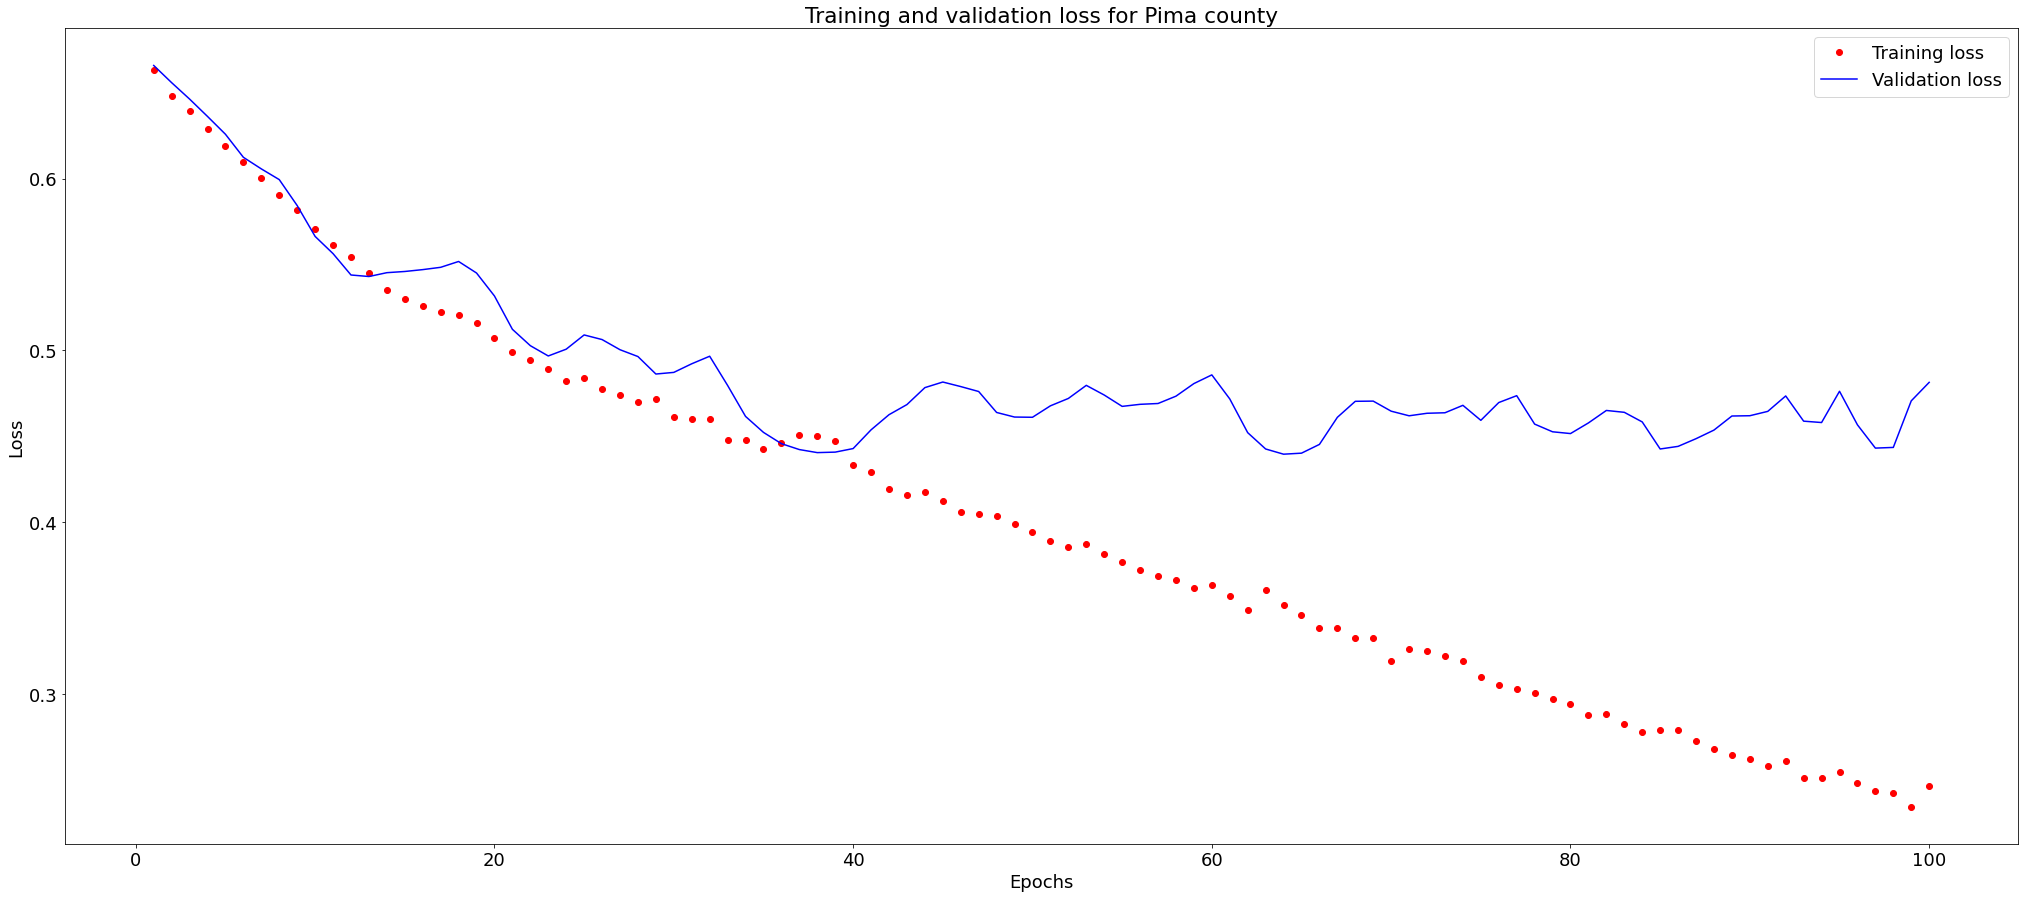

In [769]:
### Pima training and validation graph
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['val_loss']) + 1)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss', color = 'red')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss for Pima county')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.rcParams["figure.figsize"] = 35, 15
plt.rcParams.update({'font.size': 18})
plt.show()

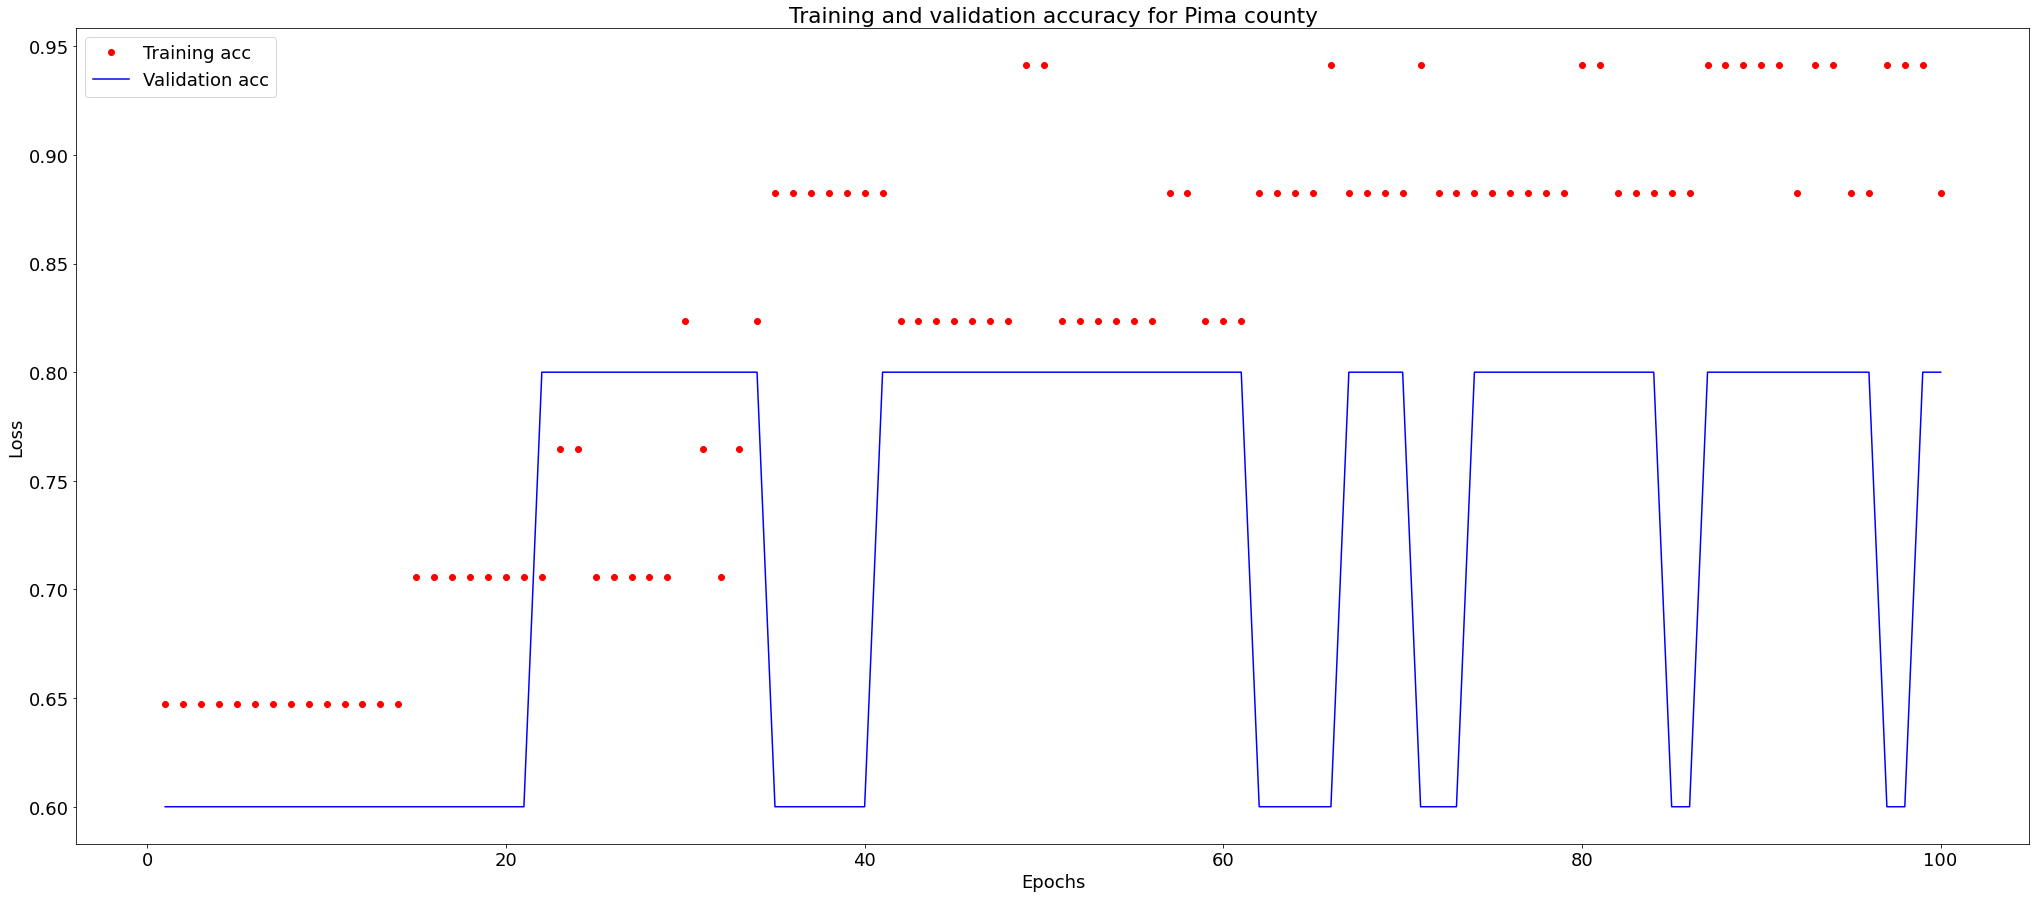

In [770]:
### Pima training and validation accuracy graph
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label = 'Training acc', color = 'red')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy for Pima county')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.rcParams["figure.figsize"] = 35, 15
plt.rcParams.update({'font.size': 18})
plt.show()

In [771]:
# Setting up activation, hidden, and output layers.
model = Sequential([
    Dense(units = 12, input_shape = (6,), activation = 'relu'),
    Dense(units = 36, activation = 'relu'),
    Dense(units = 6, activation = 'relu'),
    Dense(units = 2, activation = 'softmax')
])

# Compile model
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Layer summary
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_138 (Dense)            (None, 12)                84        
_________________________________________________________________
dense_139 (Dense)            (None, 36)                468       
_________________________________________________________________
dense_140 (Dense)            (None, 6)                 222       
_________________________________________________________________
dense_141 (Dense)            (None, 2)                 14        
Total params: 788
Trainable params: 788
Non-trainable params: 0
_________________________________________________________________


In [772]:
# Yavapai county model
yavapai = pd.read_csv("C:/Users/edoar/Documents/School_Documents/Fall_2021/Capstone/random_forest_files/yavapai.csv")

In [773]:
yavapai['prescott_hmi'] = pd.cut(yavapai.prescott_hmi, bins = [0, 199999, 600000], labels = ['0', '1'])
yavapai['prescott_hmi'] = yavapai['prescott_hmi'].astype(int)
yavapai

,date,prescott_hmi,total_arrests,crime_rate,population_estimates,poverty_percentage,state_tax
0,2000,0,6746,4790.6,168886,12.0,28921000
1,2001,0,11993,4649.8,173285,13.0,28921000
2,2002,0,11478,4587.3,178390,12.0,32497000
3,2003,0,11082,4407.5,183400,12.0,36446000
4,2004,0,12031,4274.2,189532,12.0,41321000
5,2005,1,12769,3985.0,197533,12.0,45088000
6,2006,1,12927,3491.2,206672,12.4,50351000
7,2007,1,12856,3321.6,212004,12.6,56254000
8,2008,1,11863,3077.8,214930,13.0,45642000
9,2009,1,11908,2912.6,215686,14.2,50382000


In [774]:
# Get X and y
X = yavapai.drop('prescott_hmi', axis = 1)
Y = yavapai['prescott_hmi']

# Splitting training and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

# scale data
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [775]:
# Keras model
history = model.fit(x = X_train, y = y_train.values, batch_size = 4, epochs = 100, shuffle = True, verbose = 2, validation_data = (X_test, y_test.values))

Epoch 1/100
5/5 - 0s - loss: 0.6904 - accuracy: 0.5882 - val_loss: 0.6373 - val_accuracy: 1.0000
Epoch 2/100
5/5 - 0s - loss: 0.6665 - accuracy: 0.7059 - val_loss: 0.6040 - val_accuracy: 1.0000
Epoch 3/100
5/5 - 0s - loss: 0.6507 - accuracy: 0.7059 - val_loss: 0.5924 - val_accuracy: 1.0000
Epoch 4/100
5/5 - 0s - loss: 0.6409 - accuracy: 0.6471 - val_loss: 0.5729 - val_accuracy: 1.0000
Epoch 5/100
5/5 - 0s - loss: 0.6303 - accuracy: 0.6471 - val_loss: 0.5488 - val_accuracy: 1.0000
Epoch 6/100
5/5 - 0s - loss: 0.6173 - accuracy: 0.6471 - val_loss: 0.5238 - val_accuracy: 1.0000
Epoch 7/100
5/5 - 0s - loss: 0.6031 - accuracy: 0.6471 - val_loss: 0.4993 - val_accuracy: 1.0000
Epoch 8/100
5/5 - 0s - loss: 0.5910 - accuracy: 0.6471 - val_loss: 0.4750 - val_accuracy: 1.0000
Epoch 9/100
5/5 - 0s - loss: 0.5803 - accuracy: 0.6471 - val_loss: 0.4518 - val_accuracy: 1.0000
Epoch 10/100
5/5 - 0s - loss: 0.5697 - accuracy: 0.6471 - val_loss: 0.4302 - val_accuracy: 1.0000
Epoch 11/100
5/5 - 0s - loss:

Epoch 85/100
5/5 - 0s - loss: 0.1817 - accuracy: 0.9412 - val_loss: 0.1524 - val_accuracy: 1.0000
Epoch 86/100
5/5 - 0s - loss: 0.1774 - accuracy: 0.9412 - val_loss: 0.1493 - val_accuracy: 1.0000
Epoch 87/100
5/5 - 0s - loss: 0.1753 - accuracy: 0.9412 - val_loss: 0.1452 - val_accuracy: 1.0000
Epoch 88/100
5/5 - 0s - loss: 0.1731 - accuracy: 0.9412 - val_loss: 0.1471 - val_accuracy: 1.0000
Epoch 89/100
5/5 - 0s - loss: 0.1700 - accuracy: 0.9412 - val_loss: 0.1419 - val_accuracy: 1.0000
Epoch 90/100
5/5 - 0s - loss: 0.1720 - accuracy: 0.9412 - val_loss: 0.1265 - val_accuracy: 1.0000
Epoch 91/100
5/5 - 0s - loss: 0.1665 - accuracy: 0.9412 - val_loss: 0.1317 - val_accuracy: 1.0000
Epoch 92/100
5/5 - 0s - loss: 0.1673 - accuracy: 0.9412 - val_loss: 0.1450 - val_accuracy: 1.0000
Epoch 93/100
5/5 - 0s - loss: 0.1620 - accuracy: 0.9412 - val_loss: 0.1405 - val_accuracy: 1.0000
Epoch 94/100
5/5 - 0s - loss: 0.1588 - accuracy: 0.9412 - val_loss: 0.1355 - val_accuracy: 1.0000
Epoch 95/100
5/5 - 0

In [776]:
# evaluate model accuracy
_, accuracy = model.evaluate(X, Y, verbose = 0)
print('Accuracy: %.2f' % (accuracy * 100))

Accuracy: 68.18


In [777]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

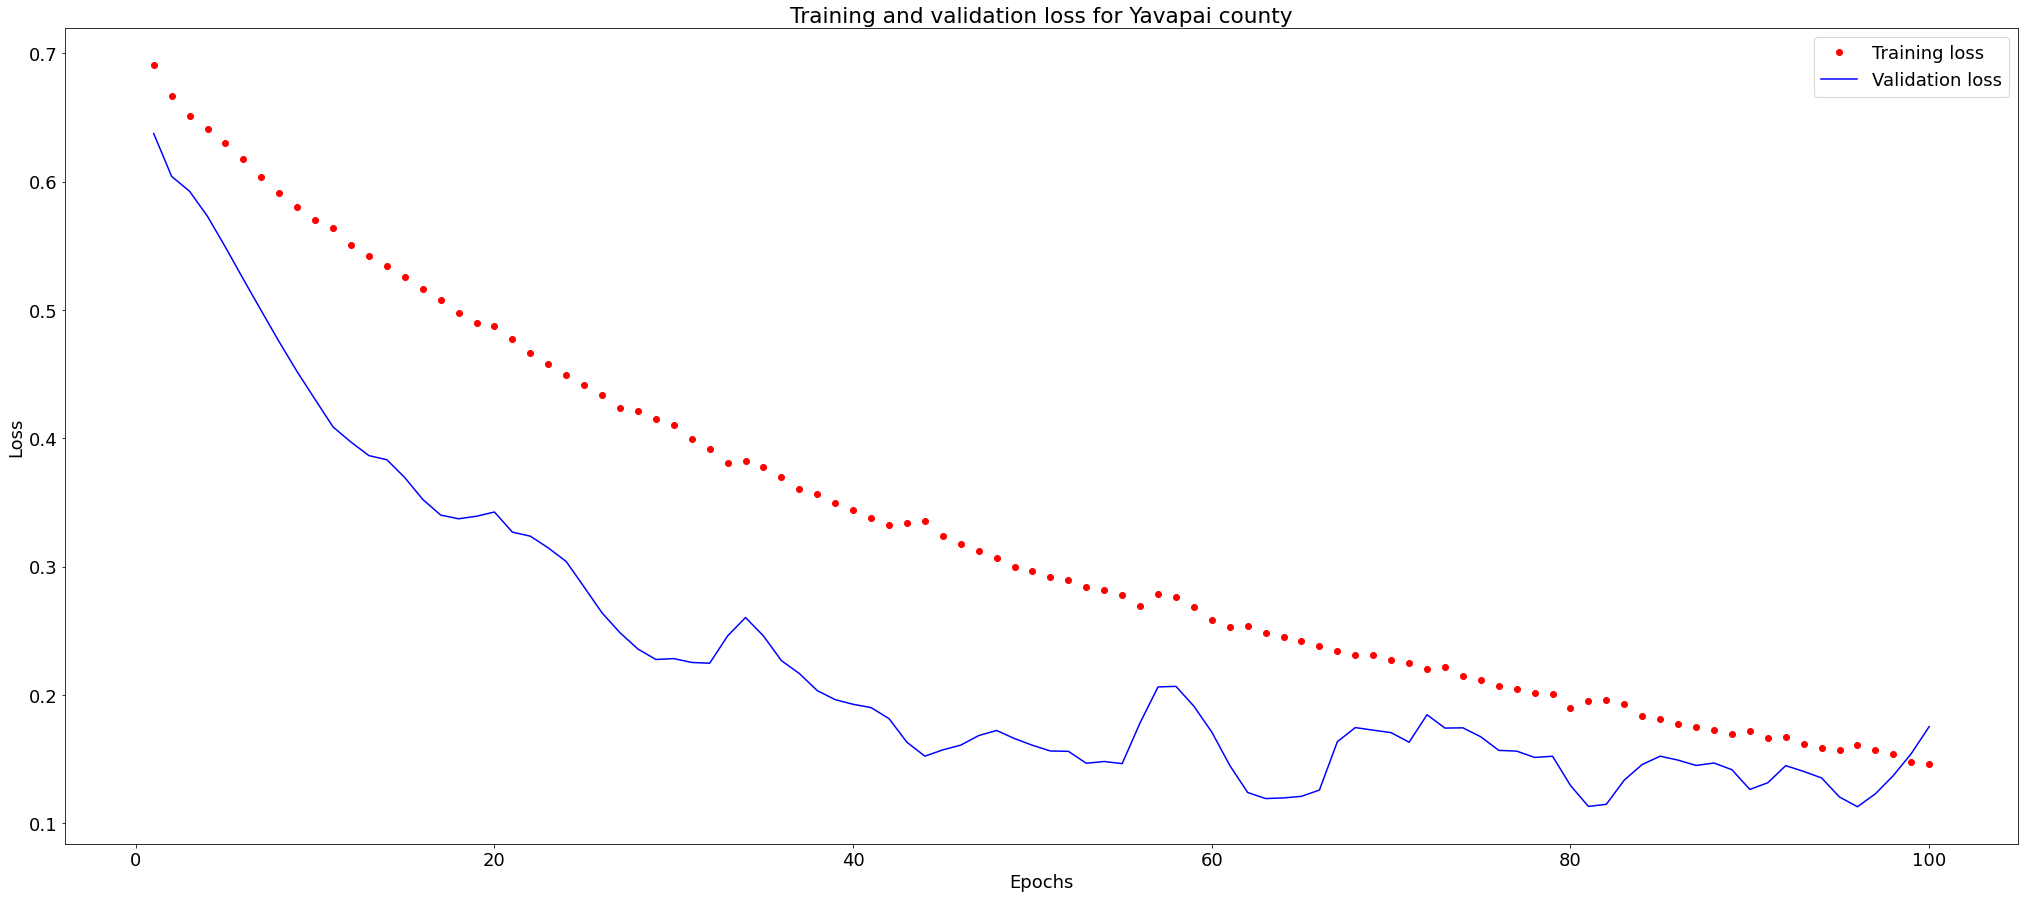

In [778]:
### Yavapai training and validation graph
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['val_loss']) + 1)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss', color = 'red')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss for Yavapai county')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.rcParams["figure.figsize"] = 25, 15
plt.rcParams.update({'font.size': 18})
plt.show()

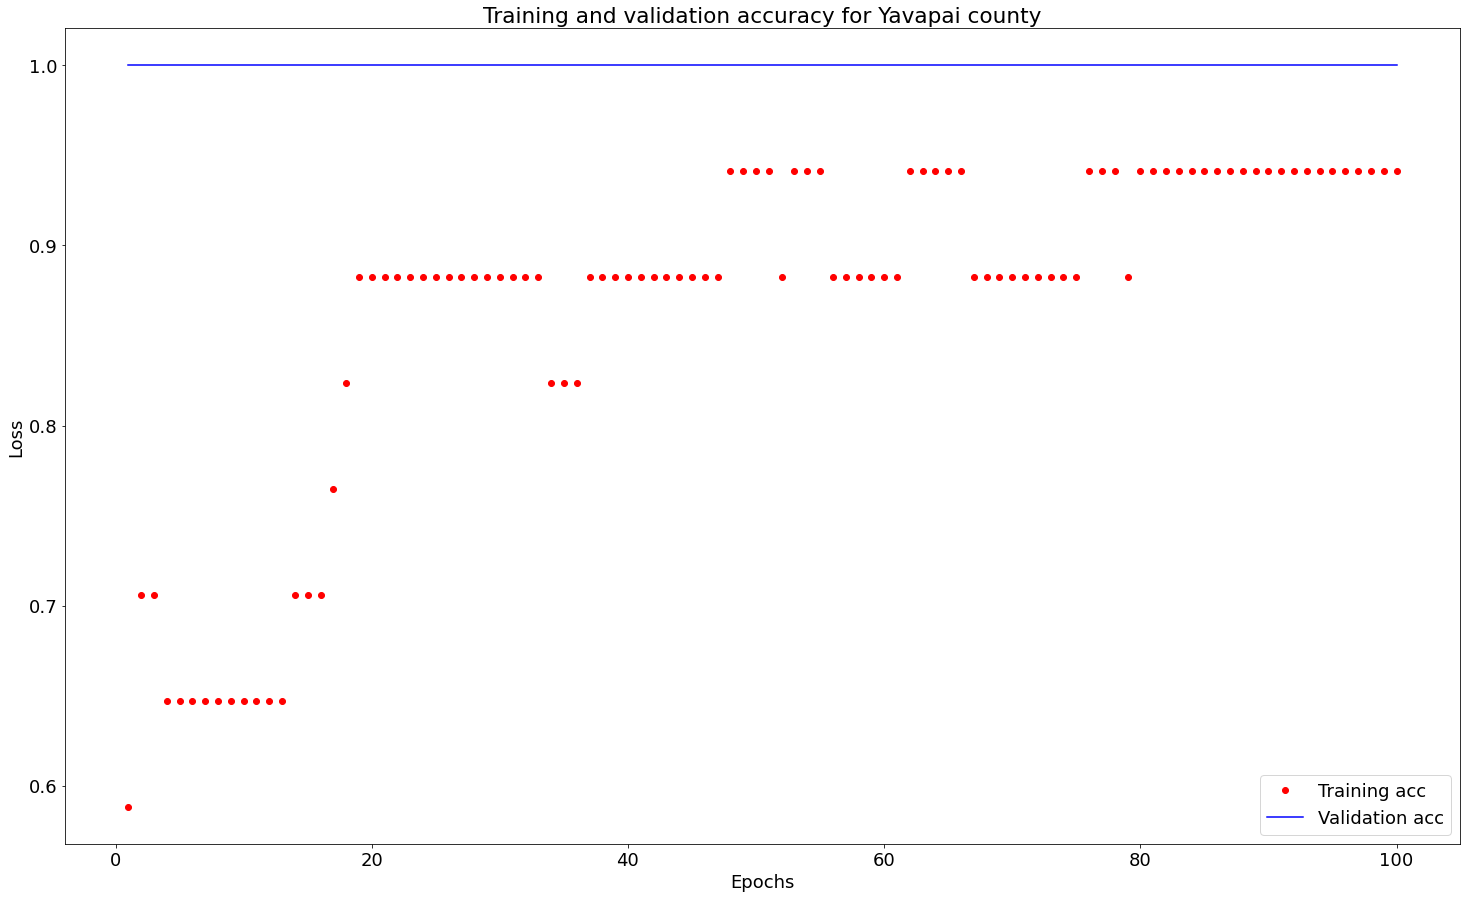

In [779]:
### Yavapai training and validation accuracy graph
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label = 'Training acc', color = 'red')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy for Yavapai county')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.rcParams["figure.figsize"] = 35, 15
plt.rcParams.update({'font.size': 18})
plt.show()